### Importing packeges

In [1]:
import preprocessor as pp
import pandas as pd
import numpy as np
import myplot as mpf

### Region: Cancer registry data

In [2]:
filenames = [r'data_files/kvinne/kvinnerkreftfylke.04-17.xlsx',r'data_files/kvinne/reseptkvinnerfylker.xls']

files = []
for i in range(len(filenames)):
    files.append(pp.excel_lines(filenames[i]))

In [3]:
files[0]

ICD-10            Kreftform   Kjønn Alder    År  Regionkode  \
0     C03–06          Munn, andre  Kvinne  Alle  2004           0   
1     C03–06          Munn, andre  Kvinne  Alle  2004         100   
2     C03–06          Munn, andre  Kvinne  Alle  2004         200   
3     C03–06          Munn, andre  Kvinne  Alle  2004         300   
4     C03–06          Munn, andre  Kvinne  Alle  2004         400   
5     C03–06          Munn, andre  Kvinne  Alle  2004         500   
6     C03–06          Munn, andre  Kvinne  Alle  2004         600   
7     C03–06          Munn, andre  Kvinne  Alle  2004         700   
8     C03–06          Munn, andre  Kvinne  Alle  2004         800   
9     C03–06          Munn, andre  Kvinne  Alle  2004         900   
10    C03–06          Munn, andre  Kvinne  Alle  2004        1000   
11    C03–06          Munn, andre  Kvinne  Alle  2004        1100   
12    C03–06          Munn, andre  Kvinne  Alle  2004        1200   
13    C03–06          Munn, andre  Kvinne  Alle  2004        1400   
14    C03–06          Munn, andre  Kvinne  Alle  2004        1500   
15    C03–06          Munn, andre  Kvinne  Alle  2004        1600   
16    C03–06          Munn, andre  Kvinne  Alle  2004        1700   
17    C03–06          Munn, andre  Kvinne  Alle  2004        1800   
18    C03–06          Munn, andre  Kvinne  Alle  2004        1900   
19    C03–06          Munn, andre  Kvinne  Alle  2004        2000   
20    C03–06          Munn, andre  Kvinne  Alle  2005           0   
21    C03–06          Munn, andre  Kvinne  Alle  2005         100   
22    C03–06          Munn, andre  Kvinne  Alle  2005         200   
23    C03–06          Munn, andre  Kvinne  Alle  2005         300   
24    C03–06          Munn, andre  Kvinne  Alle  2005         400   
25    C03–06          Munn, andre  Kvinne  Alle  2005         500   
26    C03–06          Munn, andre  Kvinne  Alle  2005         600   
27    C03–06          Munn, andre  Kvinne  Alle  2005         700   
28    C03–06          Munn, andre  Kvinne  Alle  2005         800   
29    C03–06          Munn, andre  Kvinne  Alle  2005         900   
...      ...                  ...     ...   ...   ...         ...   
1370     C55  Livmor, usesifisert  Kvinne  Alle  2016        1000   
1371     C55  Livmor, usesifisert  Kvinne  Alle  2016        1100   
1372     C55  Livmor, usesifisert  Kvinne  Alle  2016        1200   
1373     C55  Livmor, usesifisert  Kvinne  Alle  2016        1400   
1374     C55  Livmor, usesifisert  Kvinne  Alle  2016        1500   
1375     C55  Livmor, usesifisert  Kvinne  Alle  2016        1600   
1376     C55  Livmor, usesifisert  Kvinne  Alle  2016        1700   
1377     C55  Livmor, usesifisert  Kvinne  Alle  2016        1800   
1378     C55  Livmor, usesifisert  Kvinne  Alle  2016        1900   
1379     C55  Livmor, usesifisert  Kvinne  Alle  2016        2000   
1380     C55  Livmor, usesifisert  Kvinne  Alle  2017           0   
1381     C55  Livmor, usesifisert  Kvinne  Alle  2017         100   
1382     C55  Livmor, usesifisert  Kvinne  Alle  2017         200   
1383     C55  Livmor, usesifisert  Kvinne  Alle  2017         300   
1384     C55  Livmor, usesifisert  Kvinne  Alle  2017         400   
1385     C55  Livmor, usesifisert  Kvinne  Alle  2017         500   
1386     C55  Livmor, usesifisert  Kvinne  Alle  2017         600   
1387     C55  Livmor, usesifisert  Kvinne  Alle  2017         700   
1388     C55  Livmor, usesifisert  Kvinne  Alle  2017         800   
1389     C55  Livmor, usesifisert  Kvinne  Alle  2017         900   
1390     C55  Livmor, usesifisert  Kvinne  Alle  2017        1000   
1391     C55  Livmor, usesifisert  Kvinne  Alle  2017        1100   
1392     C55  Livmor, usesifisert  Kvinne  Alle  2017        1200   
1393     C55  Livmor, usesifisert  Kvinne  Alle  2017        1400   
1394     C55  Livmor, usesifisert  Kvinne  Alle  2017        1500   
1395     C55  Livmor, usesifisert  Kvinne  Alle  2017        1600   
1396

In [4]:
## Keeping only the desired data
cancer_registry = pd.DataFrame(files[0], columns= ['Kreftform','Kjønn','Region','År','Tilfeller','Personår',
                                                 'Insidensrate'])
## X axis tick label
num_region = 20
regions_xlabel = np.array(cancer_registry['Region'][0:num_region])

## years legend labels
num_years = 14
labels = []
for j in range(num_years):
    labels.append('Year: '+str(cancer_registry['År'][j*num_region])+'')

### Extracting data from excel file

In [5]:
### Extracting data from excel file
## cancer cases
c_livmorhals_all = pp.excel_extract(filenames[0], keyword = ['År','all'], num_parameter = num_region, 
                                    case = 'Tilfeller', cancer_type = 'Livmorhals')
c_anus_all = pp.excel_extract(filenames[0], keyword = ['År','all'], num_parameter = num_region, 
                              case = 'Tilfeller', cancer_type = 'Anus')
c_other_all = pp.excel_extract(filenames[0], keyword = ['År','all'], num_parameter = num_region, 
                               case = 'Tilfeller', cancer_type = 'Munn, andre')
c_livmorlegeme_all = pp.excel_extract(filenames[0], keyword = ['År','all'], num_parameter = num_region, 
                                      case = 'Tilfeller', cancer_type = 'Livmorlegeme')
c_livmor_all = pp.excel_extract(filenames[0], keyword = ['År','all'], num_parameter = num_region, 
                                case = 'Tilfeller', cancer_type = 'Livmor, usesifisert')
## Incidence rate 
incidence_livmorhals_all = pp.excel_extract(filenames[0], keyword = ['År','all'], num_parameter = num_region, 
                                            case = 'Insidensrate', cancer_type = 'Livmorhals')
incidence_anus_all = pp.excel_extract(filenames[0], keyword = ['År','all'], num_parameter = num_region, 
                                      case = 'Insidensrate', cancer_type = 'Anus')
incidence_other_all = pp.excel_extract(filenames[0], keyword = ['År','all'], num_parameter = num_region, 
                                       case = 'Insidensrate', cancer_type = 'Munn, andre')
incidence_livmorlegeme_all = pp.excel_extract(filenames[0], keyword = ['År','all'], num_parameter = num_region, 
                                              case = 'Insidensrate', cancer_type = 'Livmorlegeme')
incidence_livmor_all = pp.excel_extract(filenames[0], keyword = ['År','all'], num_parameter = num_region, 
                                        case = 'Insidensrate', cancer_type = 'Livmor, usesifisert')

## Separating norway data and region data
c_livmorhals_regions = []
c_A_regions = []
c_MO_regions = []
c_livmorlegeme_regions = []
c_livmor_regions = []

#c_A_norway = []
#c_MO_norway = []

# incidence rate 
inci_livmorhals_regions = []
inci_A_regions = []
inci_MO_regions = []
inci_livmorlegeme_regions = []
inci_livmor_regions = []

#inci_A_norway = []
#inci_MO_norway = []

for i in range(num_years):
    c_livmorhals_regions.append( c_livmorhals_all[i][1:] )
    c_A_regions.append( c_anus_all[i][1:] )
    c_MO_regions.append( c_other_all[i][1:] )
    c_livmorlegeme_regions.append( c_livmorlegeme_all[i][1:] )
    c_livmor_regions.append( c_livmor_all[i][1:] )
    
    ## Calculating incidence rate
    inci_livmorhals_regions.append( incidence_livmorhals_all[i][1:] )
    inci_A_regions.append( incidence_anus_all[i][1:] )
    inci_MO_regions.append( incidence_other_all[i][1:] )
    inci_livmorlegeme_regions.append( incidence_livmorlegeme_all[i][1:] )
    inci_livmor_regions.append( incidence_livmor_all[i][1:] )

### Region: Women cancer register in Norway

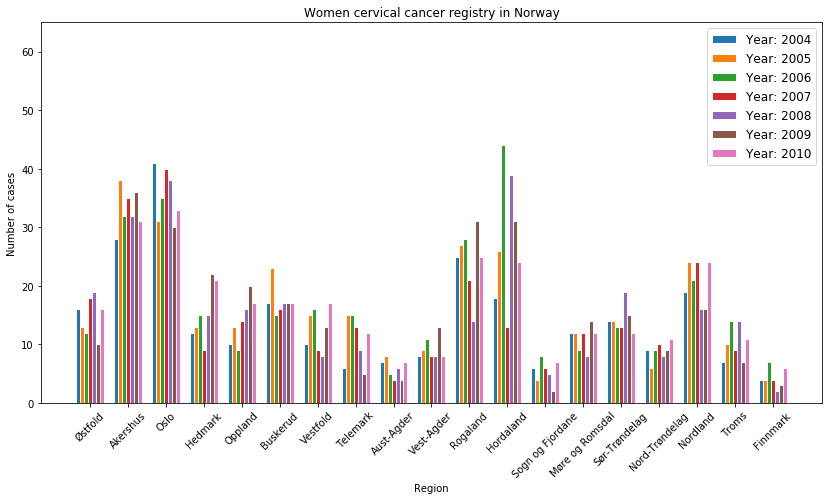

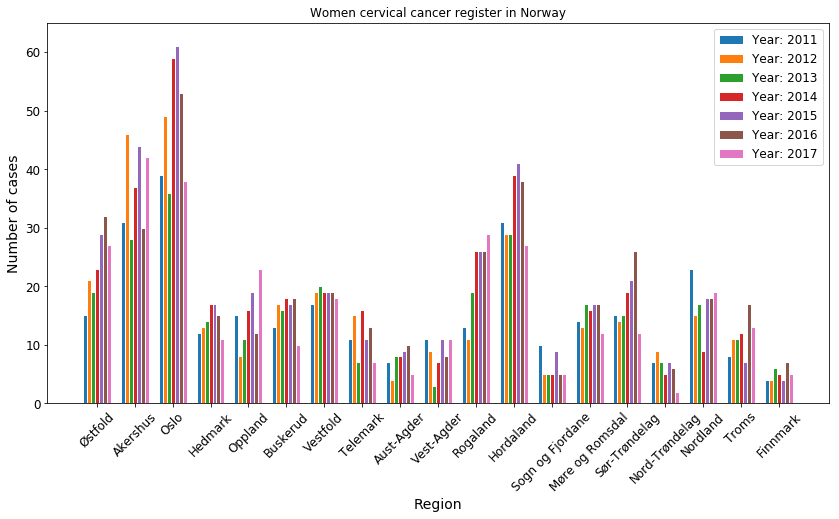

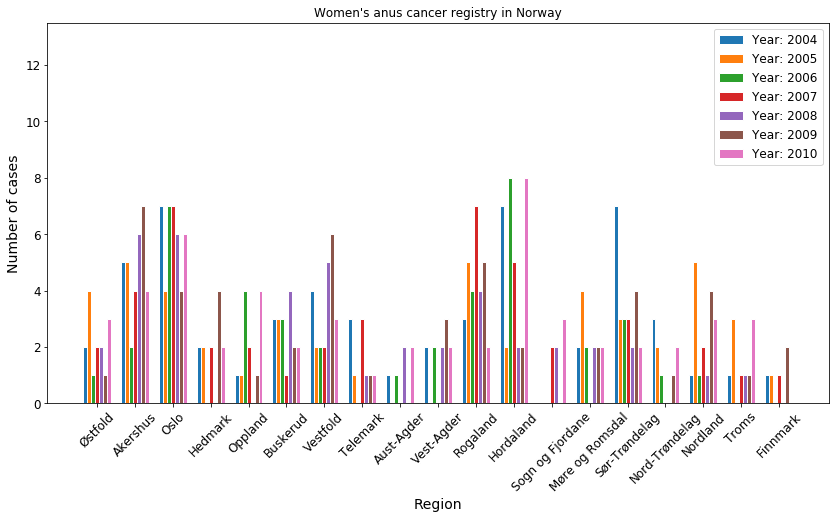

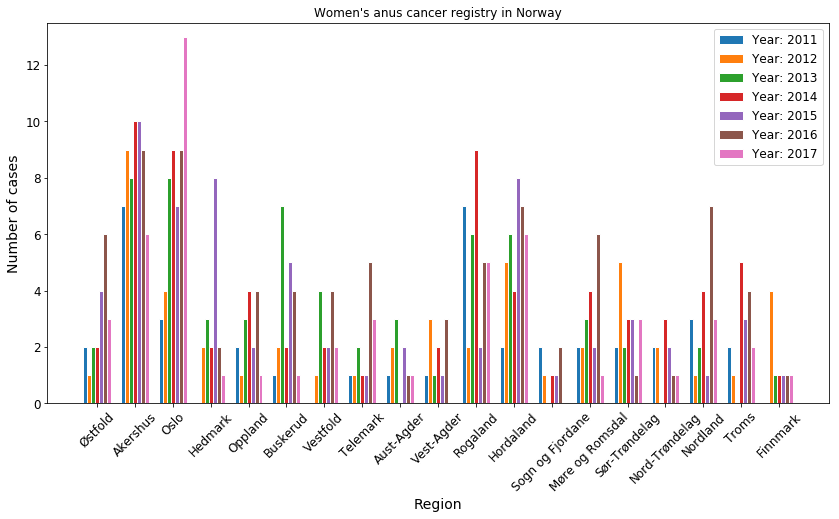

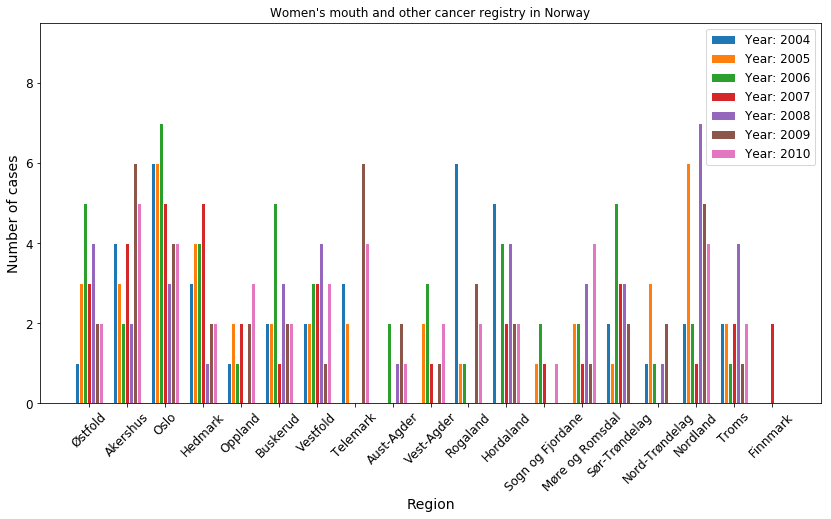

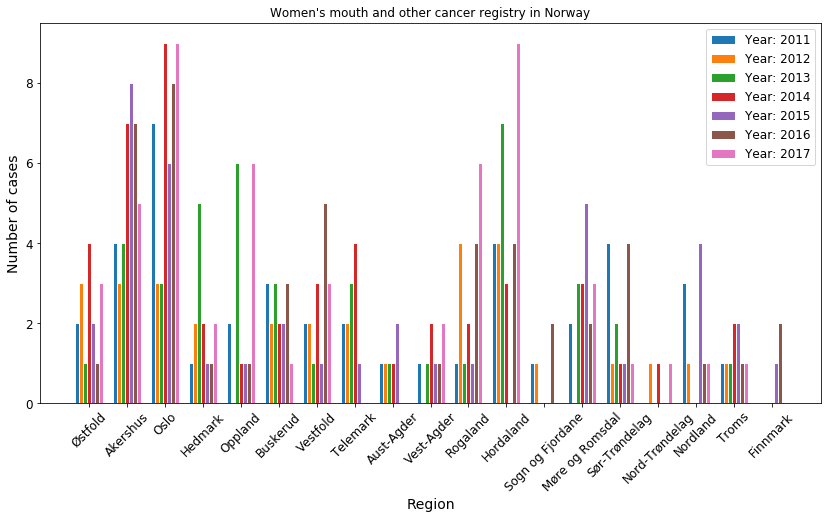

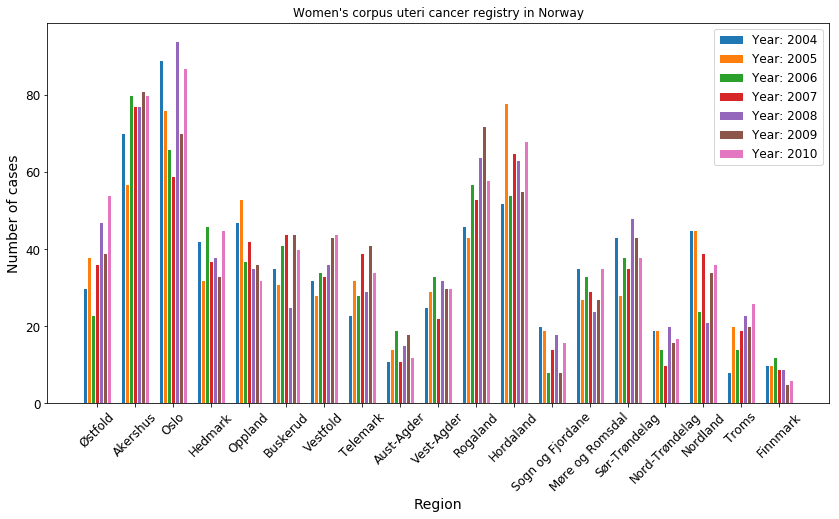

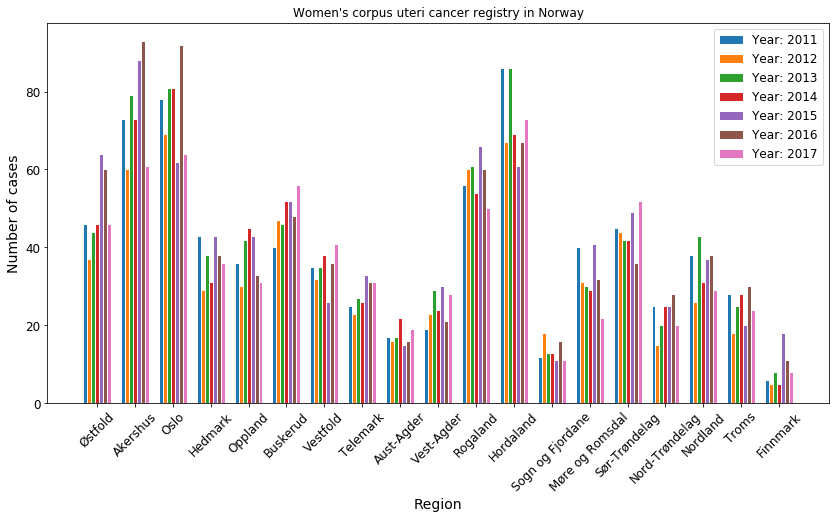

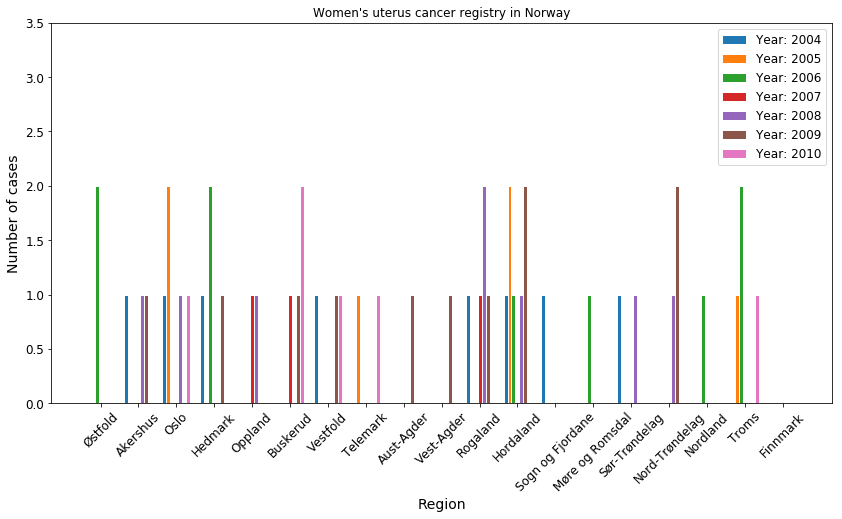

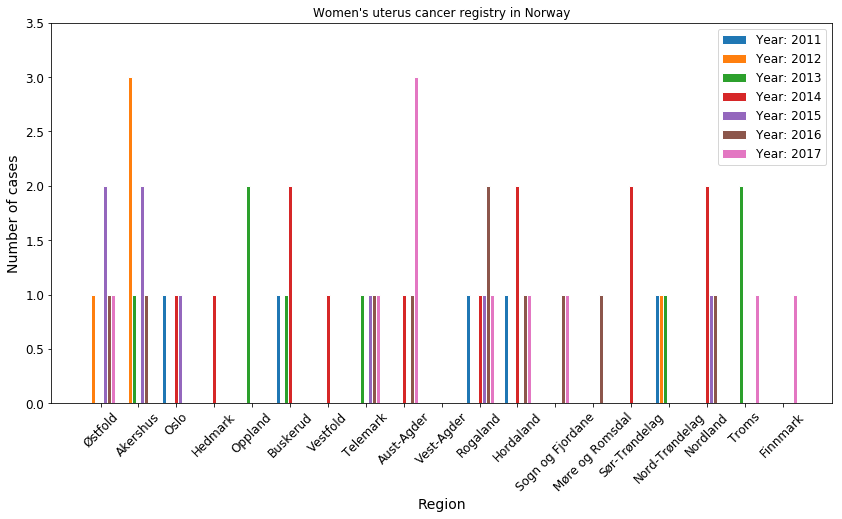

In [6]:
### Cervical cancer
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(regions_xlabel[1:], c_livmorhals_regions[0:7], titl='Women cervical cancer registry in Norway', 
                      Xlabel='Region', Ylabel='Number of cases', width = 2)
ax.set_ylim([0,65])
ax.legend(labels[0:7])
## saving figure
fig.savefig("plots/Female/region_Women_cervical_cancer_bar1.png")

fig, ax = mpf.barplot(regions_xlabel[1:], c_livmorhals_regions[7:], titl='Women cervical cancer register in Norway', 
                      Xlabel='Region', Ylabel='Number of cases', width = 2)
ax.set_ylim([0,65])
ax.legend(labels[7:])
## saving figure
fig.savefig("plots/Female/region_Women_cervical_cancer_bar2.png")
#---------------------------------------------------------------------------------------------------------------------
### Anus cancer
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(regions_xlabel[1:], c_A_regions[0:7], titl="Women's anus cancer registry in Norway",
                      Xlabel='Region', Ylabel='Number of cases', width = 2)
ax.set_ylim([0,13.5])
ax.legend(labels[0:7])
## saving figure
fig.savefig("plots/Female/region_Women's_anus_cancer_bar1.png")

fig, ax = mpf.barplot(regions_xlabel[1:], c_A_regions[7:], titl="Women's anus cancer registry in Norway",
                      Xlabel='Region', Ylabel='Number of cases', width = 2)
ax.set_ylim([0,13.5])
ax.legend(labels[7:])
## saving figure
fig.savefig("plots/Female/region_Women's_anus_cancer_bar2.png")
#---------------------------------------------------------------------------------------------------------------------
### Mouth and other
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(regions_xlabel[1:], c_MO_regions[0:7], 
                      titl="Women's mouth and other cancer registry in Norway", Xlabel='Region', 
                      Ylabel='Number of cases', width = 2)
ax.set_ylim([0,9.5])
ax.legend(labels[0:7])
## saving figure
fig.savefig("plots/Female/region_Women's_mouth_and_other_cancer_bar1.png")

fig, ax = mpf.barplot(regions_xlabel[1:], c_MO_regions[7:], 
                      titl="Women's mouth and other cancer registry in Norway", Xlabel='Region', 
                      Ylabel='Number of cases', width = 2)
ax.set_ylim([0,9.5])
ax.legend(labels[7:])
## saving figure
fig.savefig("plots/Female/region_Women's_mouth_and_other_cancer_bar2.png")
#---------------------------------------------------------------------------------------------------------------------
### Corpus uteri cancer
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(regions_xlabel[1:], c_livmorlegeme_regions[0:7], 
                      titl="Women's corpus uteri cancer registry in Norway", Xlabel='Region', 
                      Ylabel='Number of cases', width = 2)
#ax.set_ylim([0,9.5])
ax.legend(labels[0:7])
## saving figure
fig.savefig("plots/Female/region_Women's_corpus_uteri_cancer_bar1.png")

fig, ax = mpf.barplot(regions_xlabel[1:], c_livmorlegeme_regions[7:], 
                      titl="Women's corpus uteri cancer registry in Norway", Xlabel='Region', 
                      Ylabel='Number of cases', width = 2)
#ax.set_ylim([0,9.5])
ax.legend(labels[7:])
## saving figure
fig.savefig("plots/Female/region_Women's_corpus_uteri_cancer_bar2.png")
#---------------------------------------------------------------------------------------------------------------------
### Uterus cancer
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(regions_xlabel[1:], c_livmor_regions[0:7], 
                      titl="Women's uterus cancer registry in Norway", Xlabel='Region', 
                      Ylabel='Number of cases', width = 2)
ax.set_ylim([0,3.5])
ax.legend(labels[0:7])
## saving figure
fig.savefig("plots/Female/region_Women's_uterus_cancer_bar1.png")

fig, ax = mpf.barplot(regions_xlabel[1:], c_livmor_regions[7:], 
                      titl="Women's uterus cancer registry in Norway", Xlabel='Region', 
                      Ylabel='Number of cases', width = 2)
ax.set_ylim([0,3.5])
ax.legend(labels[7:])
## saving figure
fig.savefig("plots/Female/region_Women's_uterus_cancer_bar2.png")
#---------------------------------------------------------------------------------------------------------------------

### Incidence case

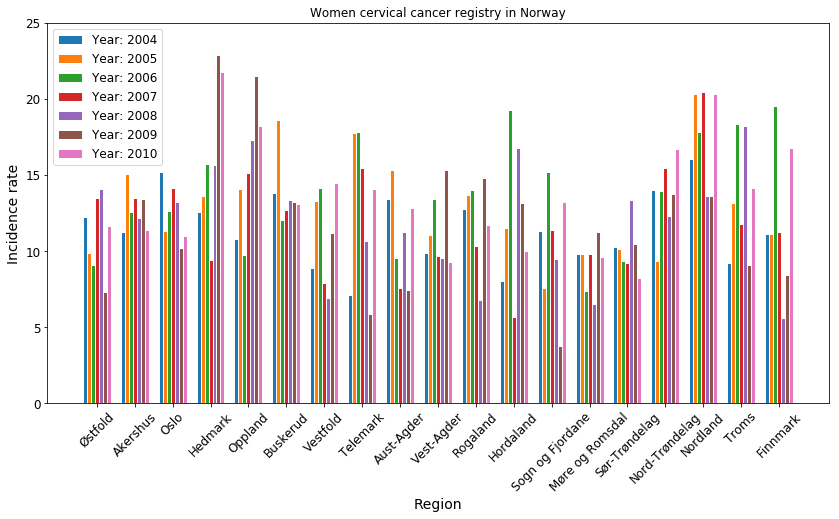

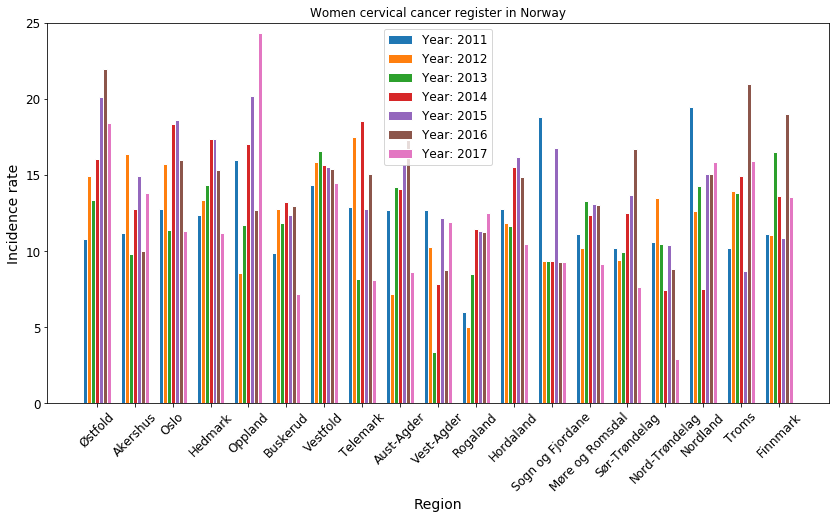

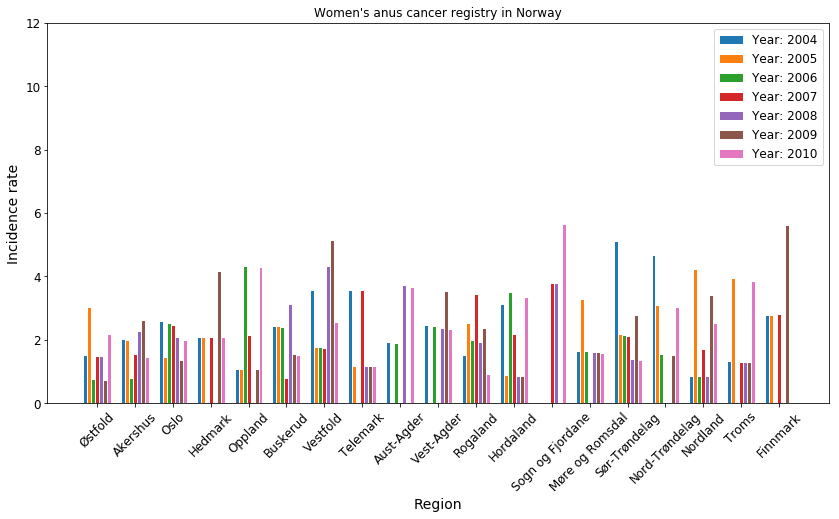

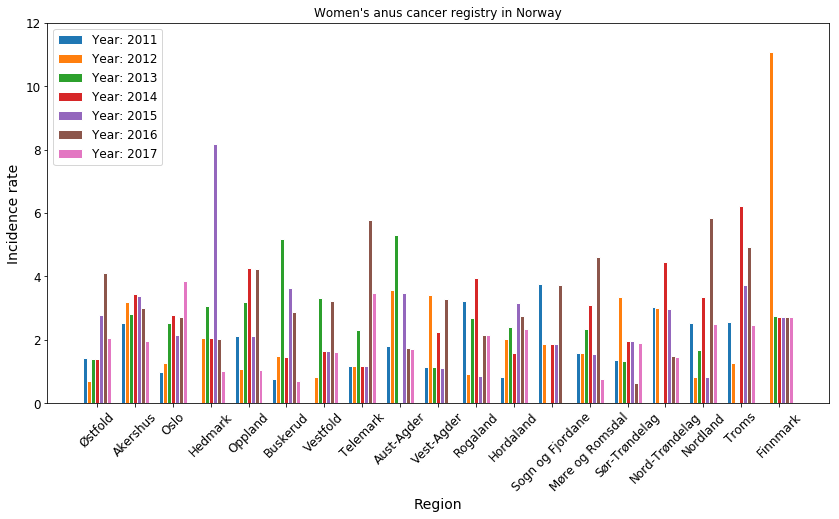

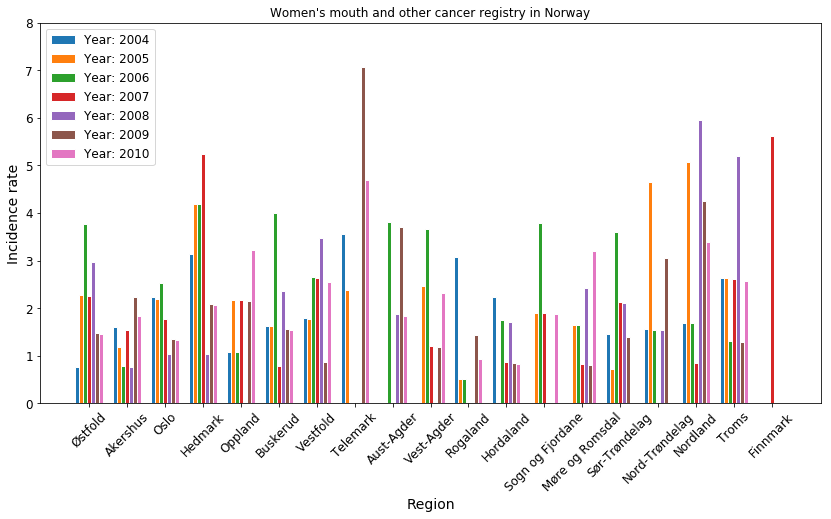

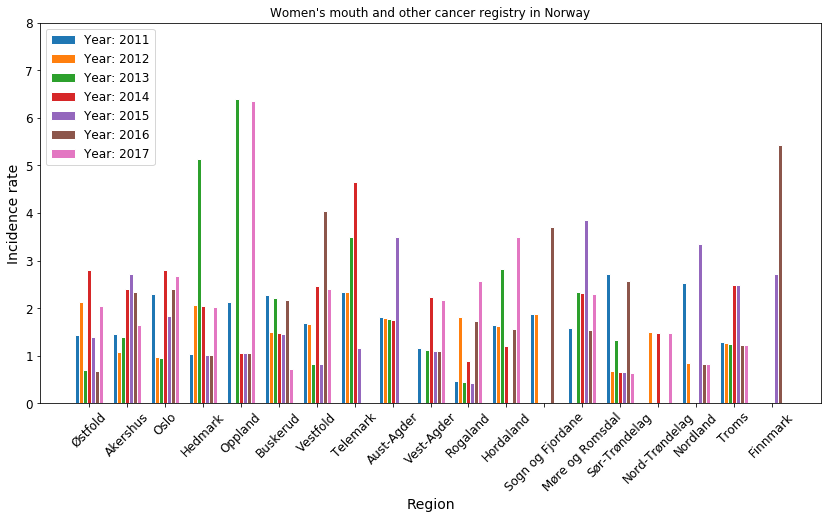

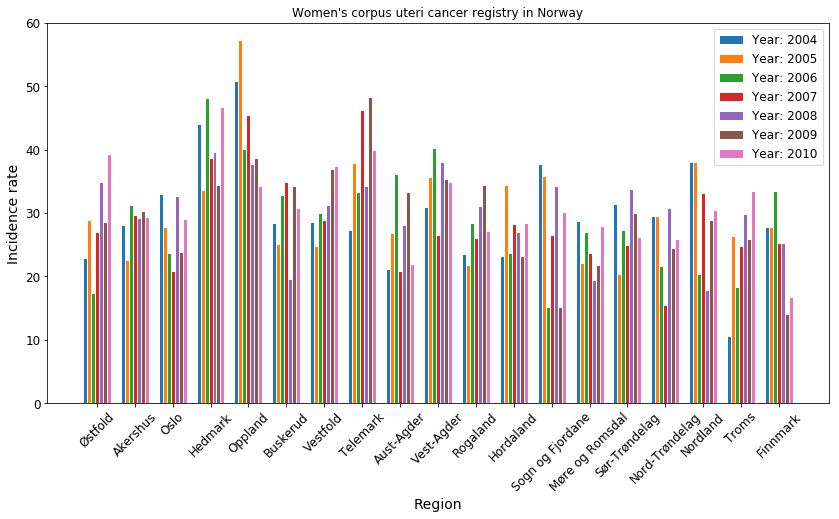

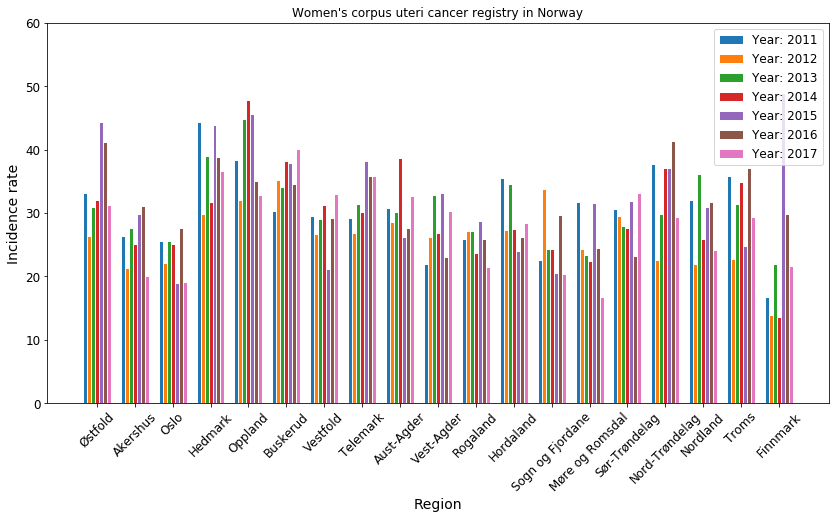

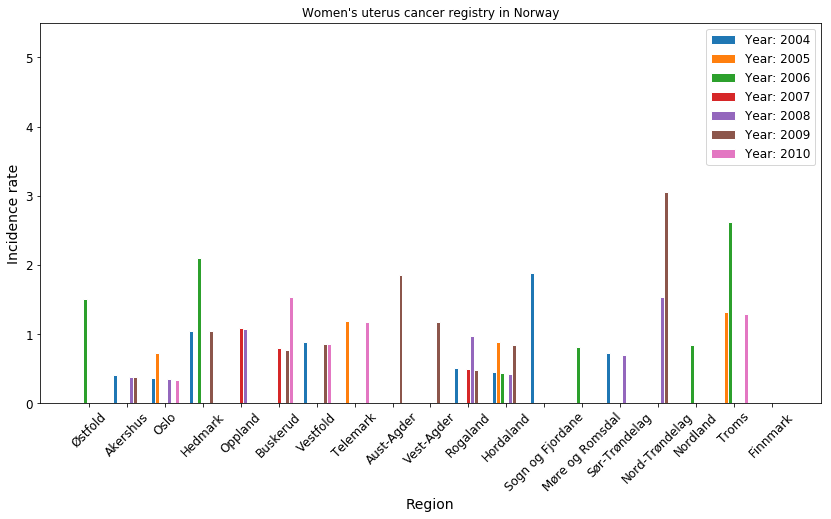

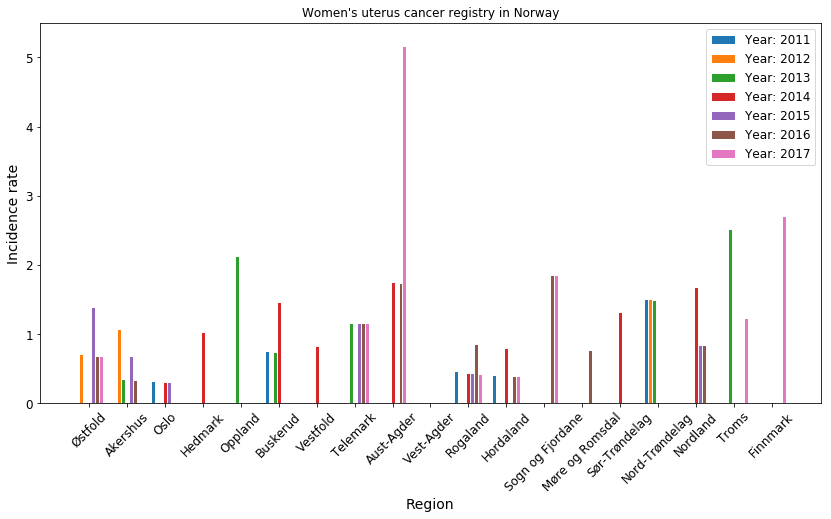

In [7]:
### Cervical cancer
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(regions_xlabel[1:], inci_livmorhals_regions[0:7], titl='Women cervical cancer registry in Norway', 
                      Xlabel='Region', Ylabel='Incidence rate', width = 2)
ax.set_ylim([0,25])
ax.legend(labels[0:7])
## saving figure
fig.savefig("plots/Female/region_Women_cervical_cancer_incidence_bar1.png")

fig, ax = mpf.barplot(regions_xlabel[1:], inci_livmorhals_regions[7:], titl='Women cervical cancer register in Norway', 
                      Xlabel='Region', Ylabel='Incidence rate', width = 2)
ax.set_ylim([0,25])
ax.legend(labels[7:])
## saving figure
fig.savefig("plots/Female/region_Women_cervical_cancer_incidence_bar2.png")
#---------------------------------------------------------------------------------------------------------------------
### Anus cancer
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(regions_xlabel[1:], inci_A_regions[0:7], titl="Women's anus cancer registry in Norway",
                      Xlabel='Region', Ylabel='Incidence rate', width = 2)
ax.set_ylim([0,12])
ax.legend(labels[0:7])
## saving figure
fig.savefig("plots/Female/region_Women's_anus_cancer_incidence_bar1.png")

fig, ax = mpf.barplot(regions_xlabel[1:], inci_A_regions[7:], titl="Women's anus cancer registry in Norway",
                      Xlabel='Region', Ylabel='Incidence rate', width = 2)
ax.set_ylim([0,12])
ax.legend(labels[7:])
## saving figure
fig.savefig("plots/Female/region_Women's_anus_cancer_incidence_bar2.png")
#---------------------------------------------------------------------------------------------------------------------
### Mouth and other
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(regions_xlabel[1:], inci_MO_regions[0:7], 
                      titl="Women's mouth and other cancer registry in Norway", Xlabel='Region', 
                      Ylabel='Incidence rate', width = 2)
ax.set_ylim([0,8])
ax.legend(labels[0:7])
## saving figure
fig.savefig("plots/Female/region_Women's_mouth_and_other_cancer_incidence_bar1.png")

fig, ax = mpf.barplot(regions_xlabel[1:], inci_MO_regions[7:], 
                      titl="Women's mouth and other cancer registry in Norway", Xlabel='Region', 
                      Ylabel='Incidence rate', width = 2)
ax.set_ylim([0,8])
ax.legend(labels[7:])
## saving figure
fig.savefig("plots/Female/region_Women's_mouth_and_other_cancer_incidence_bar2.png")
#---------------------------------------------------------------------------------------------------------------------
### Corpus uteri cancer
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(regions_xlabel[1:], inci_livmorlegeme_regions[0:7], 
                      titl="Women's corpus uteri cancer registry in Norway", Xlabel='Region', 
                      Ylabel='Incidence rate', width = 2)
ax.set_ylim([0,60])
ax.legend(labels[0:7])
## saving figure
fig.savefig("plots/Female/region_Women's_corpus_uteri_cancer_incidence_bar1.png")

fig, ax = mpf.barplot(regions_xlabel[1:], inci_livmorlegeme_regions[7:], 
                      titl="Women's corpus uteri cancer registry in Norway", Xlabel='Region', 
                      Ylabel='Incidence rate', width = 2)
ax.set_ylim([0,60])
ax.legend(labels[7:])
## saving figure
fig.savefig("plots/Female/region_Women's_corpus_uteri_cancer_incidence_bar2.png")
#---------------------------------------------------------------------------------------------------------------------
### Uterus cancer
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(regions_xlabel[1:], inci_livmor_regions[0:7], 
                      titl="Women's uterus cancer registry in Norway", Xlabel='Region', 
                      Ylabel='Incidence rate', width = 2)
ax.set_ylim([0,5.5])
ax.legend(labels[0:7])
## saving figure
fig.savefig("plots/Female/region_Women's_uterus_cancer_incidence_bar1.png")

fig, ax = mpf.barplot(regions_xlabel[1:], inci_livmor_regions[7:], 
                      titl="Women's uterus cancer registry in Norway", Xlabel='Region', 
                      Ylabel='Incidence rate', width = 2)
ax.set_ylim([0,5.5])
ax.legend(labels[7:])
## saving figure
fig.savefig("plots/Female/region_Women's_uterus_cancer_incidence_bar2.png")
#---------------------------------------------------------------------------------------------------------------------

### Prescription Database

In [8]:
files[1][8:353]

Reseptregisteret  Unnamed: 1  Unnamed: 2 Unnamed: 3  \
8              J07BM      2004.0  Alle aldre     Kvinne   
9                NaN         NaN         NaN        NaN   
10               NaN         NaN         NaN        NaN   
11               NaN         NaN         NaN        NaN   
12               NaN         NaN         NaN        NaN   
13               NaN         NaN         NaN        NaN   
14               NaN         NaN         NaN        NaN   
15               NaN         NaN         NaN        NaN   
16               NaN         NaN         NaN        NaN   
17               NaN         NaN         NaN        NaN   
18               NaN         NaN         NaN        NaN   
19               NaN         NaN         NaN        NaN   
20               NaN         NaN         NaN        NaN   
21               NaN         NaN         NaN        NaN   
22               NaN         NaN         NaN        NaN   
23               NaN         NaN         NaN        NaN   
24               NaN         NaN         NaN        NaN   
25               NaN         NaN         NaN        NaN   
26               NaN         NaN         NaN        NaN   
27               NaN         NaN         NaN        NaN   
28               NaN         NaN         NaN        NaN   
29               NaN         NaN         NaN        NaN   
30               NaN         NaN         NaN        NaN   
31               NaN      2005.0  Alle aldre     Kvinne   
32               NaN         NaN         NaN        NaN   
33               NaN         NaN         NaN        NaN   
34               NaN         NaN         NaN        NaN   
35               NaN         NaN         NaN        NaN   
36               NaN         NaN         NaN        NaN   
37               NaN         NaN         NaN        NaN   
..               ...         ...         ...        ...   
323              NaN         NaN         NaN        NaN   
324              NaN         NaN         NaN        NaN   
325              NaN         NaN         NaN        NaN   
326              NaN         NaN         NaN        NaN   
327              NaN         NaN         NaN        NaN   
328              NaN         NaN         NaN        NaN   
329              NaN         NaN         NaN        NaN   
330              NaN      2018.0  Alle aldre     Kvinne   
331              NaN         NaN         NaN        NaN   
332              NaN         NaN         NaN        NaN   
333              NaN         NaN         NaN        NaN   
334              NaN         NaN         NaN        NaN   
335              NaN         NaN         NaN        NaN   
336              NaN         NaN         NaN        NaN   
337              NaN         NaN         NaN        NaN   
338              NaN         NaN         NaN        NaN   
339              NaN         NaN         NaN        NaN   
340              NaN         NaN         NaN        NaN   
341              NaN         NaN         NaN        NaN   
342              NaN         NaN         NaN        NaN   
343              NaN         NaN         NaN        NaN   
344              NaN         NaN         NaN        NaN   
345              NaN         NaN         NaN        NaN   
346              NaN         NaN         NaN        NaN   
347              NaN         NaN         NaN        NaN   
348              NaN         NaN         NaN        NaN   
349              NaN         NaN         NaN        NaN   
350              NaN         NaN         NaN        NaN   
351              NaN         NaN         NaN        NaN   
352              NaN         NaN         NaN        NaN   

                 Unnamed: 4 Unnamed: 5 Unnamed: 6  Unnamed: 7  Unnamed: 8  \
8               Hele landet        NaN          0         NaN         NaN   
9    Helseregion Midt-Norge        NaN          0         NaN         NaN   
10   Helseregion Nord-Norge        NaN          0         NaN         NaN   
11      Helseregion Sør-Øst        Na

In [9]:
## processing the file
dataframe = files[1][8:353]
pd_registry = dataframe

pd_registry['Year'] = dataframe['Unnamed: 1']
pd_registry['Gender'] = dataframe['Unnamed: 3']
pd_registry['Region'] = dataframe['Unnamed: 4']
pd_registry['Cases'] = dataframe['Unnamed: 6']

for i in range(1,9):
    # Dropping old columns
    pd_registry.drop(columns = ['Unnamed: '+str(i)+''], inplace = True)

/Users/luxiusmmm/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/luxiusmmm/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/luxiusmmm/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [10]:
pd_registry

Reseptregisteret Rapport dato: 23.06.2019 15:53    Year  Gender  \
8              J07BM                            NaN  2004.0  Kvinne   
9                NaN                            NaN     NaN     NaN   
10               NaN                            NaN     NaN     NaN   
11               NaN                            NaN     NaN     NaN   
12               NaN                            NaN     NaN     NaN   
13               NaN                            NaN     NaN     NaN   
14               NaN                            NaN     NaN     NaN   
15               NaN                            NaN     NaN     NaN   
16               NaN                            NaN     NaN     NaN   
17               NaN                            NaN     NaN     NaN   
18               NaN                            NaN     NaN     NaN   
19               NaN                            NaN     NaN     NaN   
20               NaN                            NaN     NaN     NaN   
21               NaN                            NaN     NaN     NaN   
22               NaN                            NaN     NaN     NaN   
23               NaN                            NaN     NaN     NaN   
24               NaN                            NaN     NaN     NaN   
25               NaN                            NaN     NaN     NaN   
26               NaN                            NaN     NaN     NaN   
27               NaN                            NaN     NaN     NaN   
28               NaN                            NaN     NaN     NaN   
29               NaN                            NaN     NaN     NaN   
30               NaN                            NaN     NaN     NaN   
31               NaN                            NaN  2005.0  Kvinne   
32               NaN                            NaN     NaN     NaN   
33               NaN                            NaN     NaN     NaN   
34               NaN                            NaN     NaN     NaN   
35               NaN                            NaN     NaN     NaN   
36               NaN                            NaN     NaN     NaN   
37               NaN                            NaN     NaN     NaN   
..               ...                            ...     ...     ...   
323              NaN                            NaN     NaN     NaN   
324              NaN                            NaN     NaN     NaN   
325              NaN                            NaN     NaN     NaN   
326              NaN                            NaN     NaN     NaN   
327              NaN                            NaN     NaN     NaN   
328              NaN                            NaN     NaN     NaN   
329              NaN                            NaN     NaN     NaN   
330              NaN                            NaN  2018.0  Kvinne   
331              NaN                            NaN     NaN     NaN   
332              NaN                            NaN     NaN     NaN   
333              NaN                            NaN     NaN     NaN   
334              NaN                            NaN     NaN     NaN   
335              NaN                            NaN     NaN     NaN   
336              NaN                            NaN     NaN     NaN   
337              NaN                            NaN     NaN     NaN   
338              NaN                            NaN     NaN     NaN   
339              NaN                            NaN     NaN     NaN   
340              NaN                            NaN     NaN     NaN   
341              NaN                            NaN     NaN     NaN   
342              NaN                            NaN     NaN     NaN   
343              NaN                            NaN     NaN     NaN   
344              NaN                            NaN     NaN     NaN   
345              NaN                            NaN     NaN     NaN   
346              NaN                            NaN     NaN     NaN   
347              NaN        

In [11]:
## labels
pd_year_label = []
for i in range(4,10):
    pd_year_label.append( 'Year: 200'+str(i)+'' )
for i in range(10,19):
    pd_year_label.append( 'Year: 20'+str(i)+'' )

pd_divition = np.array(pd_registry['Region'][0:5])
pd_regions = np.array(pd_registry['Region'][5:23])

### extracting data
pd_data = []
for i in range(len(pd_year_label)):
    start = i*(len(pd_regions)+len(pd_divition))
    end = (1 + i)*(len(pd_regions)+len(pd_divition))
    
    pd_data.append( np.array(pd_registry['Cases'][start:end]) )

## changing 'under 5' to 2
pd_data2 = []
for i in range(len(pd_data)):
    for j in range(len(pd_data[i])):
        if pd_data[i][j] == 'under 5':
            pd_data[i][j] = 2
            
    pd_data2.append( pd_data[i] )

## separating divitions and regions
pd_casesD = []
pd_casesR = []
for i in range(len(pd_year_label)):
    pd_casesD.append( pd_data[i][0:5] )
    pd_casesR.append( pd_data[i][5:] )

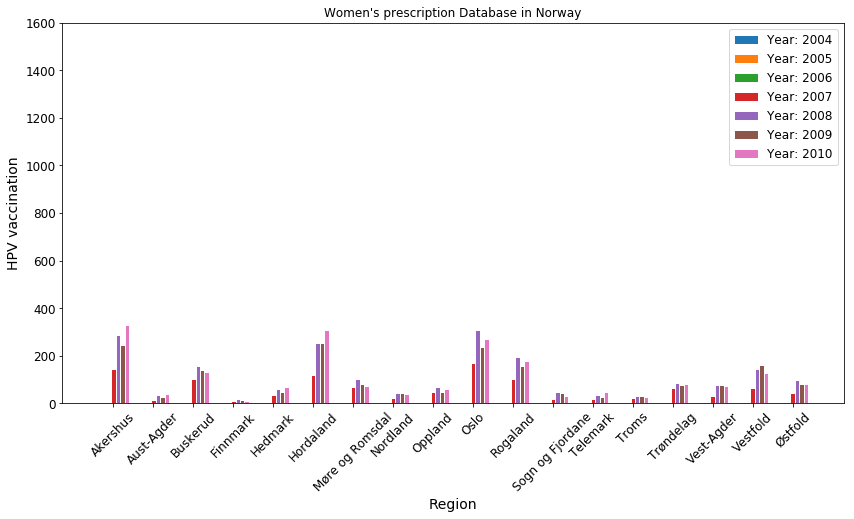

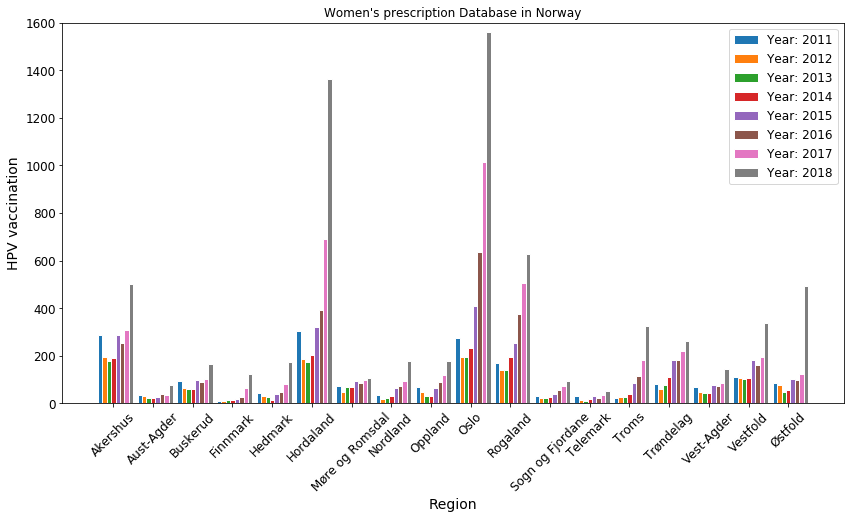

In [12]:
fig, ax = mpf.barplot(pd_regions, pd_casesR[0:7], titl="Women's prescription Database in Norway", Xlabel='Region',
                      Ylabel='HPV vaccination', width = 2)
ax.set_ylim([0,1600])
ax.legend(pd_year_label[0:7])
## saving figure
fig.savefig("plots/Female/region_Women's_HPV_bar1.png")

fig, ax = mpf.barplot(pd_regions, pd_casesR[7:], titl="Women's prescription Database in Norway", Xlabel='Region', 
                      Ylabel='HPV vaccination', width = 2)
ax.set_ylim([0,1600])
ax.legend(pd_year_label[7:])
## saving figure
fig.savefig("plots/Female/region_Women's_HPV_bar2.png")

### Vaccine and cancer in the same plot

In [13]:
print(pd_regions)
print(regions_xlabel)

['Akershus' 'Aust-Agder' 'Buskerud' 'Finnmark' 'Hedmark' 'Hordaland'
 'Møre og Romsdal' 'Nordland' 'Oppland' 'Oslo' 'Rogaland'
 'Sogn og Fjordane' 'Telemark' 'Troms' 'Trøndelag' 'Vest-Agder' 'Vestfold'
 'Østfold']
['Norge' 'Østfold' 'Akershus' 'Oslo' 'Hedmark' 'Oppland' 'Buskerud'
 'Vestfold' 'Telemark' 'Aust-Agder' 'Vest-Agder' 'Rogaland' 'Hordaland'
 'Sogn og Fjordane' 'Møre og Romsdal' 'Sør-Trøndelag' 'Nord-Trøndelag'
 'Nordland' 'Troms' 'Finnmark']


In [14]:
### aligning cancer and vaccine data
ordered_c_livmorhals = []
ordered_c_A = []
ordered_c_MO = []
ordered_c_livmorlegeme = []
ordered_c_livmor = []
ordered_v = []
ordered_xlabel = []
## year loop
for i in range(len(labels)):
    temp_c_livmorhals = []
    temp_c_A = []
    temp_c_MO = []
    temp_c_livmorlegeme = []
    temp_c_livmor = []
    temp_v = []
    
    ## cancer loop
    for j in range(1,len(regions_xlabel)):
        ## vaccine loop
        for k in range(len(pd_regions)):
            # checking when they are equal
            if regions_xlabel[j] == pd_regions[k]:
                temp_c_livmorhals.append(inci_livmorhals_regions[i][j-1])
                temp_c_A.append(inci_A_regions[i][j-1])
                temp_c_MO.append(inci_MO_regions[i][j-1])
                temp_c_livmorlegeme.append(inci_livmorlegeme_regions[i][j-1])
                temp_c_livmor.append(inci_livmor_regions[i][j-1])
                temp_v.append(pd_casesR[i][k])
                ordered_xlabel.append(regions_xlabel[j])
    
    ordered_c_livmorhals.append(temp_c_livmorhals)
    ordered_c_A.append(temp_c_A)
    ordered_c_MO.append(temp_c_MO)
    ordered_c_livmorlegeme.append(temp_c_livmorlegeme)
    ordered_c_livmor.append(temp_c_livmor)
    ordered_v.append(temp_v)

In [15]:
print(ordered_xlabel[0:17])
x = np.linspace(0,len(ordered_xlabel[0:17])-1, 17)

['Østfold', 'Akershus', 'Oslo', 'Hedmark', 'Oppland', 'Buskerud', 'Vestfold', 'Telemark', 'Aust-Agder', 'Vest-Agder', 'Rogaland', 'Hordaland', 'Sogn og Fjordane', 'Møre og Romsdal', 'Nordland', 'Troms', 'Finnmark']


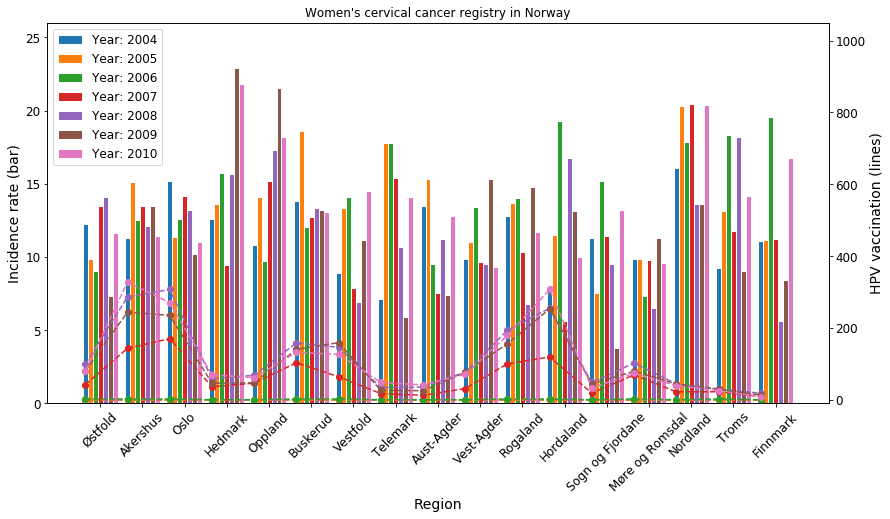

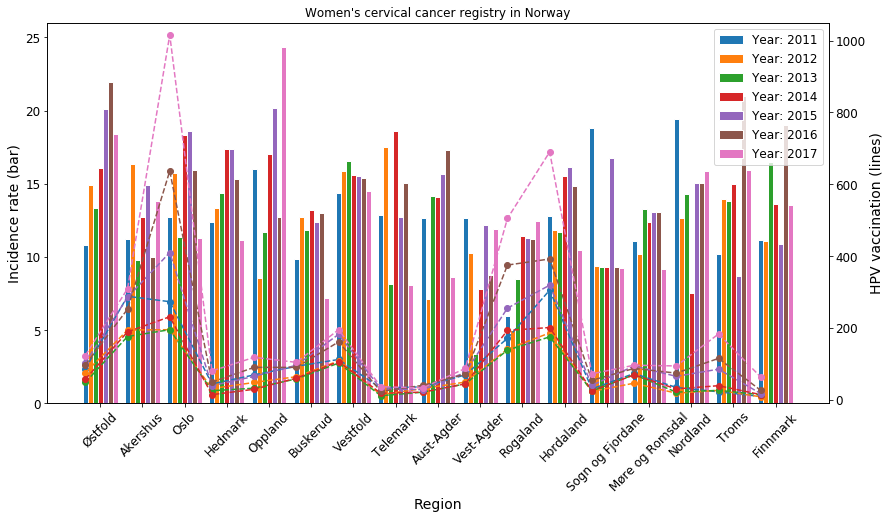

In [16]:
### Cervical cancer
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(ordered_xlabel[0:17], ordered_c_livmorhals[0:7], titl="Women's cervical cancer registry in Norway", 
                      Xlabel='Region', Ylabel='Incidence rate (bar)', width = 2)
ax.set_ylim([0,26])
ax2 = ax.twinx()
for i in range(7):
    ax2.plot(x, ordered_v[i], 'o--')
ax.legend(labels[0:7])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([-10,1050])
fig.savefig("plots/Female/region_Vaccine_cancer(cervical)_femalebar1.png")

#
fig, ax = mpf.barplot(ordered_xlabel[0:17], ordered_c_livmorhals[7:], titl="Women's cervical cancer registry in Norway", 
                      Xlabel='Region', Ylabel='Incidence rate (bar)', width = 2)
ax.set_ylim([0,26])
ax2 = ax.twinx()
for i in range(7, len(ordered_c_livmorhals)):
    ax2.plot(x, ordered_v[i], 'o--')
ax.legend(labels[7:])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([-10,1050])
fig.savefig("plots/Female/region_Vaccine_cancer(cervical)_femalebar2.png")
#---------------------------------------------------------------------------------------------------------------------

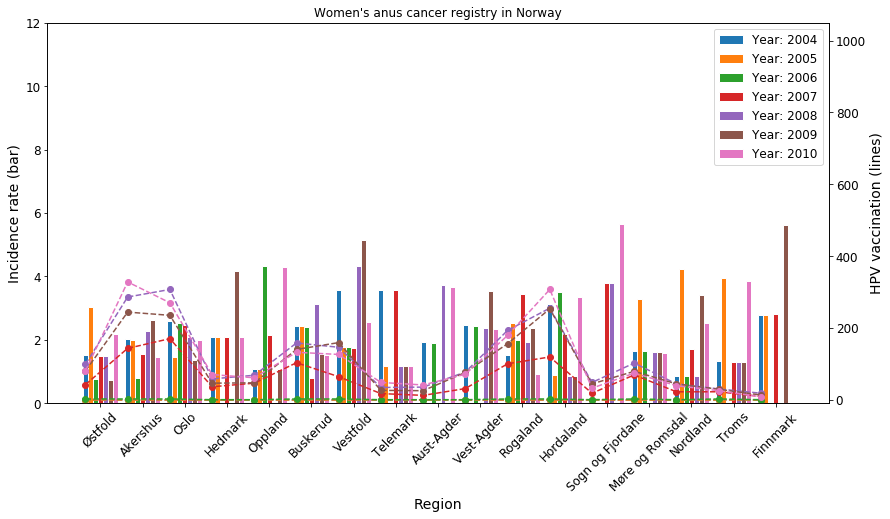

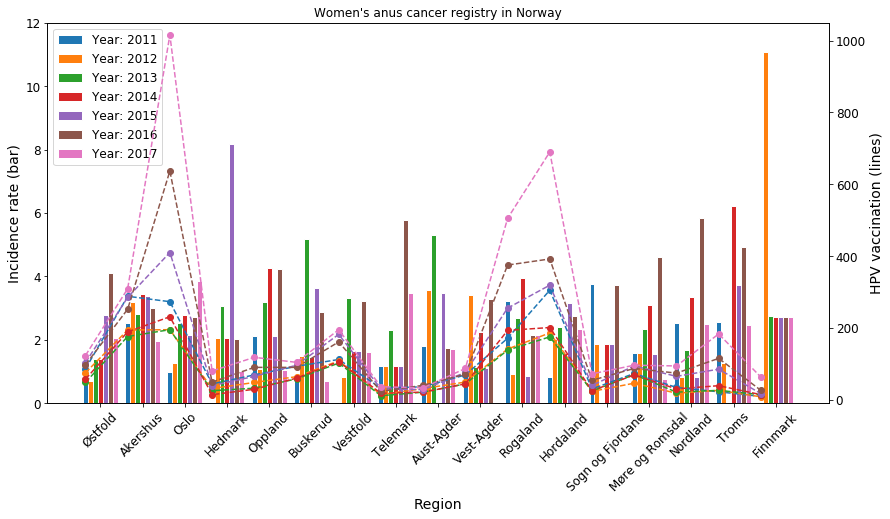

In [17]:
### Anus cancer
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(ordered_xlabel[0:17], ordered_c_A[0:7], titl="Women's anus cancer registry in Norway", 
                      Xlabel='Region', Ylabel='Incidence rate (bar)', width = 2)
ax.set_ylim([0,12])
ax2 = ax.twinx()
for i in range(7):
    ax2.plot(x, ordered_v[i], 'o--')
ax.legend(labels[0:7])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([-10,1050])
fig.savefig("plots/Female/region_Vaccine_cancer(anus)_femalebar1.png")

#
fig, ax = mpf.barplot(ordered_xlabel[0:17], ordered_c_A[7:], titl="Women's anus cancer registry in Norway", 
                      Xlabel='Region', Ylabel='Incidence rate (bar)', width = 2)
ax.set_ylim([0,12])
ax2 = ax.twinx()
for i in range(7, len(ordered_c_A)):
    ax2.plot(x, ordered_v[i], 'o--')
ax.legend(labels[7:])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([-10,1050])
fig.savefig("plots/Female/region_Vaccine_cancer(anus)_femalebar2.png")
#---------------------------------------------------------------------------------------------------------------------

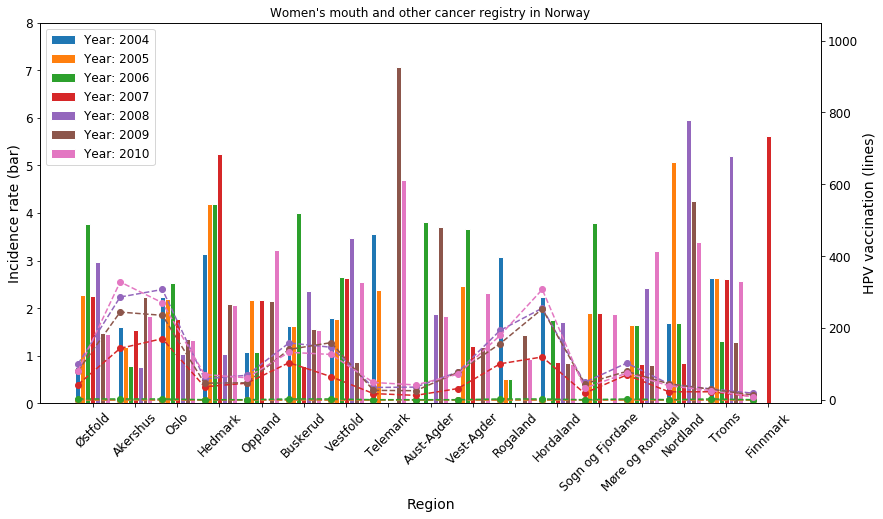

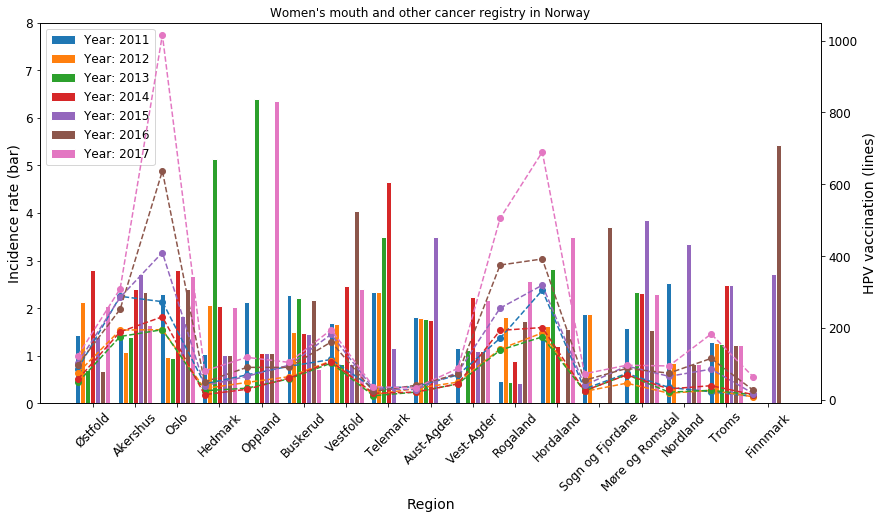

In [18]:
### Mouth and other cancer
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(ordered_xlabel[0:17], ordered_c_MO[0:7], 
                      titl="Women's mouth and other cancer registry in Norway", Xlabel='Region', 
                      Ylabel='Incidence rate (bar)', width = 2)
ax.set_ylim([0,8])
ax2 = ax.twinx()
for i in range(7):
    ax2.plot(x, ordered_v[i], 'o--')
ax.legend(labels[0:7])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([-10,1050])
fig.savefig("plots/Female/region_Vaccine_cancer(MouthAndOther)_femalebar1.png")

#
fig, ax = mpf.barplot(ordered_xlabel[0:17], ordered_c_MO[7:], 
                      titl="Women's mouth and other cancer registry in Norway", Xlabel='Region', 
                      Ylabel='Incidence rate (bar)', width = 2)
ax.set_ylim([0,8])
ax2 = ax.twinx()
for i in range(7, len(ordered_c_MO)):
    ax2.plot(x, ordered_v[i], 'o--')
ax.legend(labels[7:])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([-10,1050])
fig.savefig("plots/Female/region_Vaccine_cancer(MouthAndOther)_femalebar2.png")
#---------------------------------------------------------------------------------------------------------------------

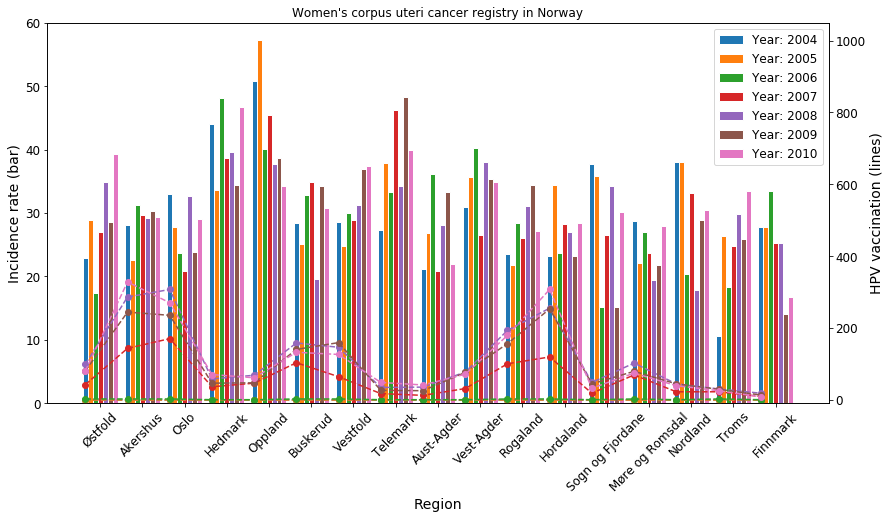

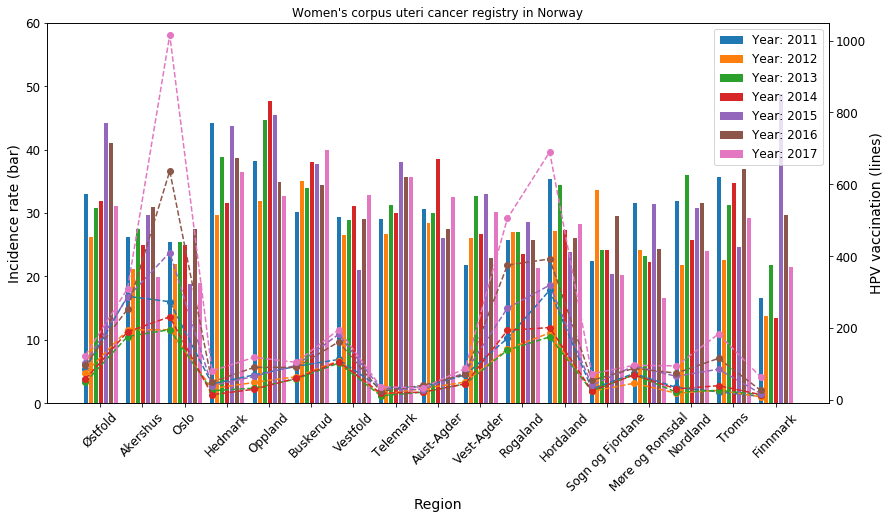

In [19]:
### Corpus uteri cancer
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(ordered_xlabel[0:17], ordered_c_livmorlegeme[0:7], titl="Women's corpus uteri cancer registry in Norway", 
                      Xlabel='Region', Ylabel='Incidence rate (bar)', width = 2)
ax.set_ylim([0,60])
ax2 = ax.twinx()
for i in range(7):
    ax2.plot(x, ordered_v[i], 'o--')
ax.legend(labels[0:7])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([-10,1050])
fig.savefig("plots/Female/region_Vaccine_cancer(CorpusUteri)_femalebar1.png")

#
fig, ax = mpf.barplot(ordered_xlabel[0:17], ordered_c_livmorlegeme[7:], titl="Women's corpus uteri cancer registry in Norway", 
                      Xlabel='Region', Ylabel='Incidence rate (bar)', width = 2)
ax.set_ylim([0,60])
ax2 = ax.twinx()
for i in range(7, len(ordered_c_livmorlegeme)):
    ax2.plot(x, ordered_v[i], 'o--')
ax.legend(labels[7:])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([-10,1050])
fig.savefig("plots/Female/region_Vaccine_cancer(CorpusUteri)_femalebar2.png")
#---------------------------------------------------------------------------------------------------------------------

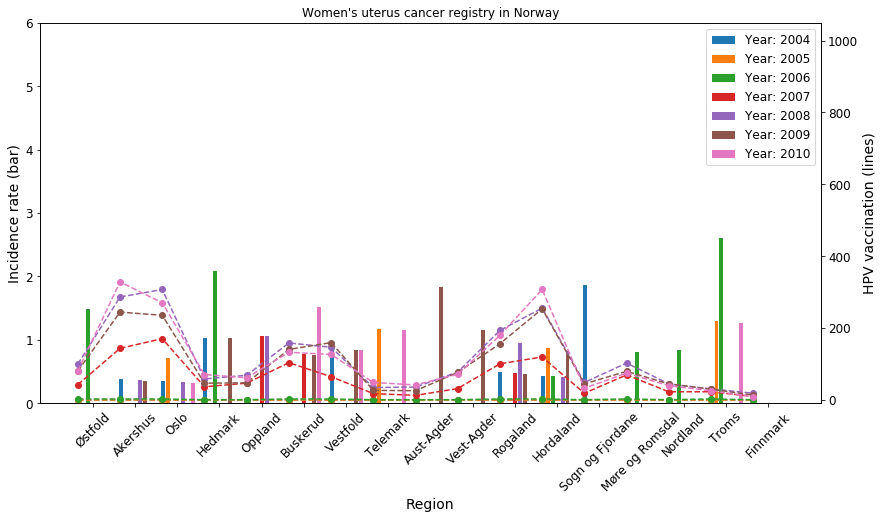

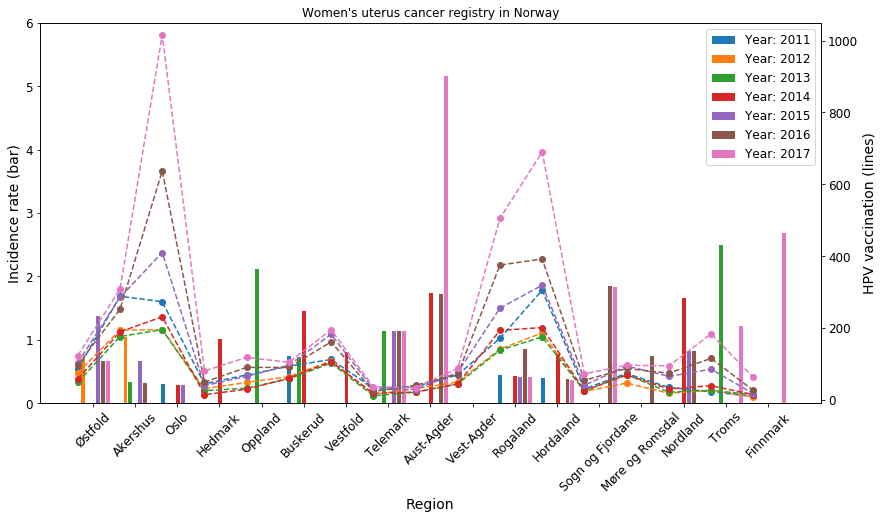

In [20]:
### Uterus cancer
#---------------------------------------------------------------------------------------------------------------------
fig, ax = mpf.barplot(ordered_xlabel[0:17], ordered_c_livmor[0:7], titl="Women's uterus cancer registry in Norway", 
                      Xlabel='Region', Ylabel='Incidence rate (bar)', width = 2)
ax.set_ylim([0,6])
ax2 = ax.twinx()
for i in range(7):
    ax2.plot(x, ordered_v[i], 'o--')
ax.legend(labels[0:7])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([-10,1050])
fig.savefig("plots/Female/region_Vaccine_cancer(uterus)_femalebar1.png")

#
fig, ax = mpf.barplot(ordered_xlabel[0:17], ordered_c_livmor[7:], titl="Women's uterus cancer registry in Norway", 
                      Xlabel='Region', Ylabel='Incidence rate (bar)', width = 2)
ax.set_ylim([0,6])
ax2 = ax.twinx()
for i in range(7, len(ordered_c_livmor)):
    ax2.plot(x, ordered_v[i], 'o--')
ax.legend(labels[7:])
ax2.set_ylabel('HPV vaccination (lines)')
ax2.set_ylim([-10,1050])
fig.savefig("plots/Female/region_Vaccine_cancer(uterus)_femalebar2.png")
#---------------------------------------------------------------------------------------------------------------------

#### Vaccine and cancer in the same plot (Total for each year)

In [21]:
temp1 = np.zeros(len(c_A_regions))
temp2 = np.zeros(len(c_A_regions))
temp3 = np.zeros(len(c_A_regions))
temp4 = np.zeros(len(c_A_regions))
temp5 = np.zeros(len(c_A_regions))
temp6 = np.zeros(len(c_A_regions))
for iyear in range(len(labels)):
    for iregion in range(len(c_A_regions[0])-1):
        temp1[iyear] = temp1[iyear] + pd_casesR[iyear][iregion]
        temp2[iyear] = temp2[iyear] + inci_livmorhals_regions[iyear][iregion]
        temp3[iyear] = temp3[iyear] + inci_A_regions[iyear][iregion]
        temp4[iyear] = temp4[iyear] + inci_MO_regions[iyear][iregion]
        temp5[iyear] = temp5[iyear] + inci_livmorlegeme_regions[iyear][iregion]
        temp6[iyear] = temp6[iyear] + inci_livmor_regions[iyear][iregion]
    temp2[iyear] = temp2[iyear] + inci_livmorhals_regions[iyear][iregion+1]
    temp3[iyear] = temp3[iyear] + inci_A_regions[iyear][iregion+1]
    temp4[iyear] = temp4[iyear] + inci_MO_regions[iyear][iregion+1]
    temp5[iyear] = temp5[iyear] + inci_livmorlegeme_regions[iyear][iregion+1]
    temp6[iyear] = temp6[iyear] + inci_livmor_regions[iyear][iregion+1]
        
total_pd = temp1
total_c_livmorhals = temp2
total_c_A = temp3
total_c_MO = temp4
total_c_livmorlegeme = temp5
total_c_livmor = temp6

In [22]:
x = np.linspace(0,len(inci_livmorhals_regions)-1, len(inci_livmorhals_regions))
year_labels = []
for j in range(num_years):
    year_labels.append(''+str(cancer_registry['År'][j*num_region])+'')

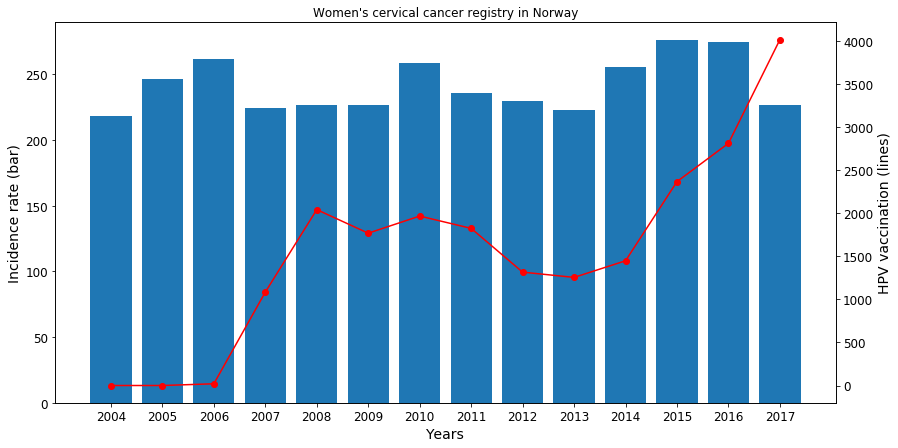

In [23]:
### cervical cancer
fig, ax = mpf.barplot(year_labels, total_c_livmorhals, 
                      titl="Women's cervical cancer registry in Norway", Xlabel='Years', 
                      Ylabel='Incidence rate (bar)', width = 2)
ax2 = ax.twinx()
ax2.plot(x, total_pd, 'ro-')
ax2.set_ylabel('HPV vaccination (lines)')
fig.savefig("plots/Female/region_Total_Vaccine_cancer(cervical)_female.png")

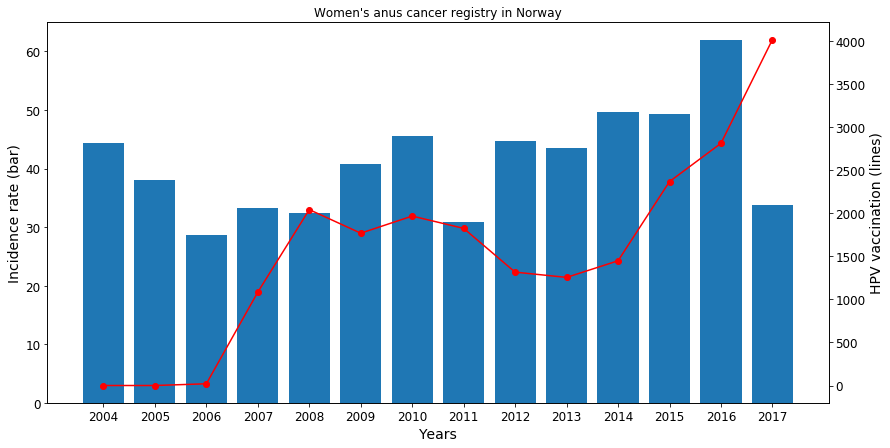

In [24]:
### Anus cancer
fig, ax = mpf.barplot(year_labels, total_c_A, 
                      titl="Women's anus cancer registry in Norway", Xlabel='Years', 
                      Ylabel='Incidence rate (bar)', width = 0)
ax2 = ax.twinx()
ax2.plot(x, total_pd, 'ro-')
ax2.set_ylabel('HPV vaccination (lines)')
fig.savefig("plots/Female/region_Total_Vaccine_cancer(anus)_female.png")

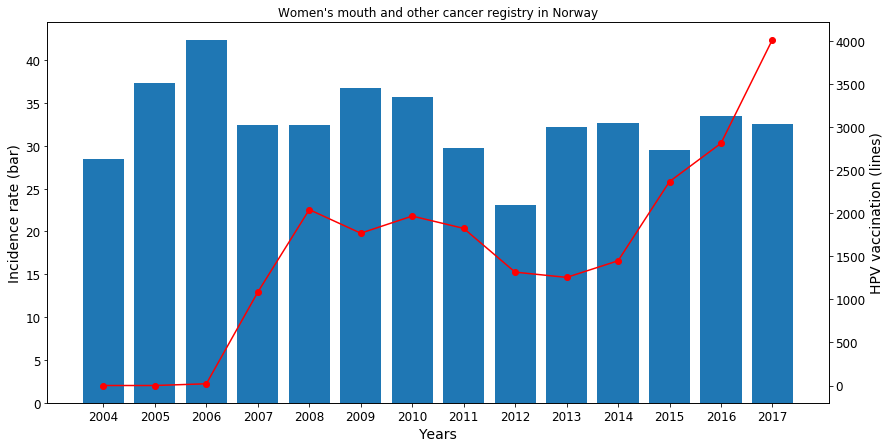

In [25]:
### Mouth and other cancer
fig, ax = mpf.barplot(year_labels, total_c_MO, 
                      titl="Women's mouth and other cancer registry in Norway", Xlabel='Years', 
                      Ylabel='Incidence rate (bar)', width = 0)
ax2 = ax.twinx()
ax2.plot(x, total_pd, 'ro-')
ax2.set_ylabel('HPV vaccination (lines)')
fig.savefig("plots/Female/region_Total_Vaccine_cancer(MouthAndOther)_female.png")

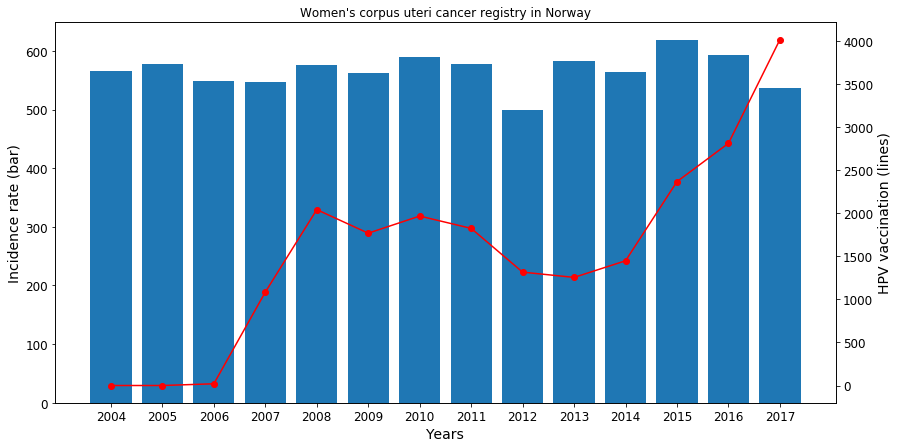

In [26]:
### Corpus uteri cancer
fig, ax = mpf.barplot(year_labels, total_c_livmorlegeme, 
                      titl="Women's corpus uteri cancer registry in Norway", Xlabel='Years', 
                      Ylabel='Incidence rate (bar)', width = 0)
ax2 = ax.twinx()
ax2.plot(x, total_pd, 'ro-')
ax2.set_ylabel('HPV vaccination (lines)')
fig.savefig("plots/Female/region_Total_Vaccine_cancer(CorpusUteri)_female.png")

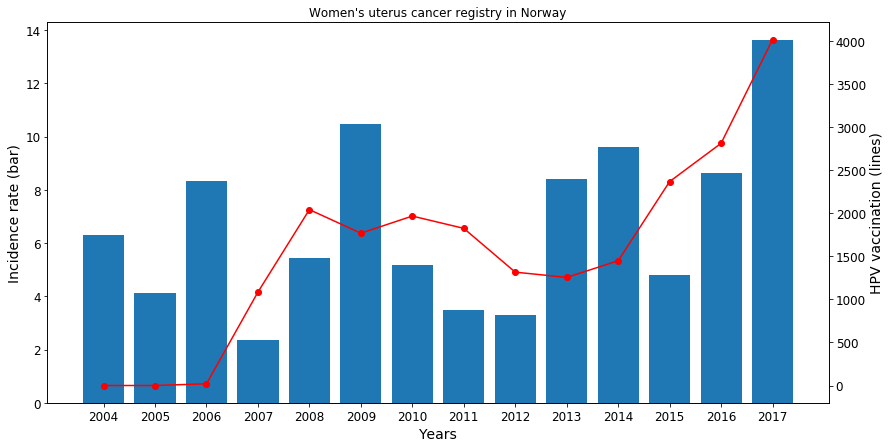

In [27]:
### Uterus cancer
fig, ax = mpf.barplot(year_labels, total_c_livmor, 
                      titl="Women's uterus cancer registry in Norway", Xlabel='Years', 
                      Ylabel='Incidence rate (bar)', width = 0)
ax2 = ax.twinx()
ax2.plot(x, total_pd, 'ro-')
ax2.set_ylabel('HPV vaccination (lines)')
fig.savefig("plots/Female/region_Total_Vaccine_cancer(uterus)_female.png")

### Incidence rate for each cancer type

In [28]:
from matplotlib.ticker import MaxNLocator

In [29]:
x = np.linspace(0,18,19)
c_label = ['Cervical','Anus','Mouth and other','Corpus uteri','Uterus']
regions = regions_xlabel

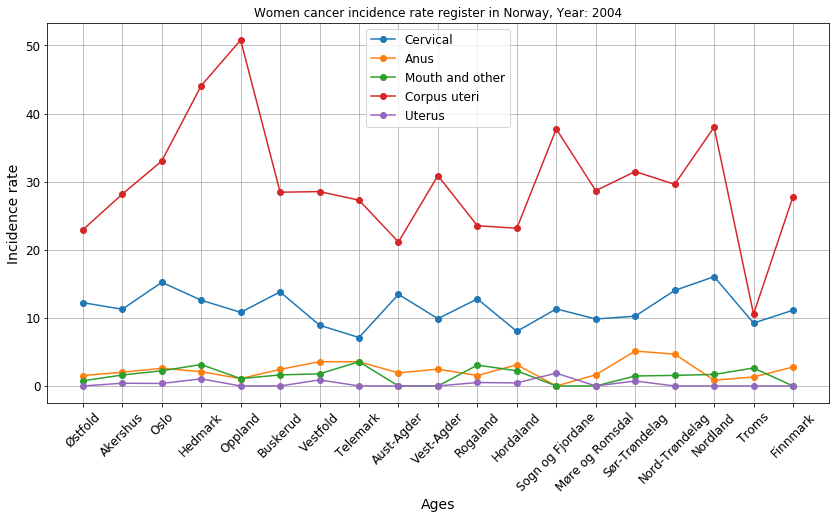

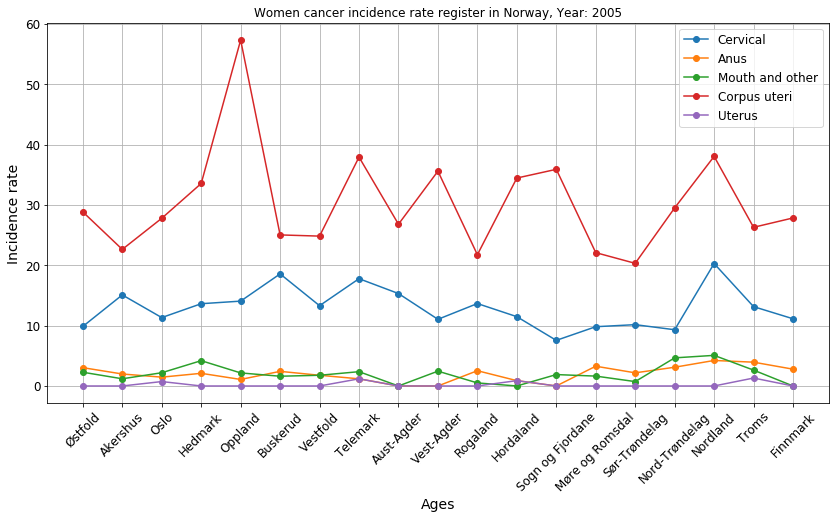

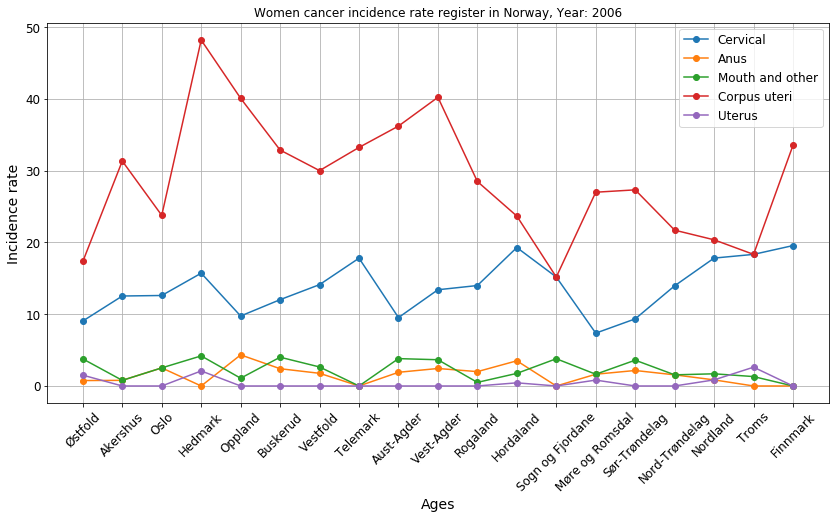

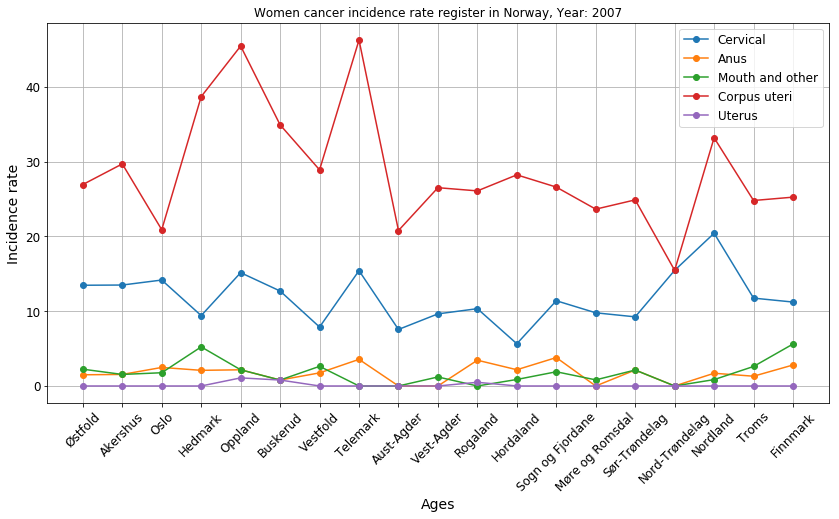

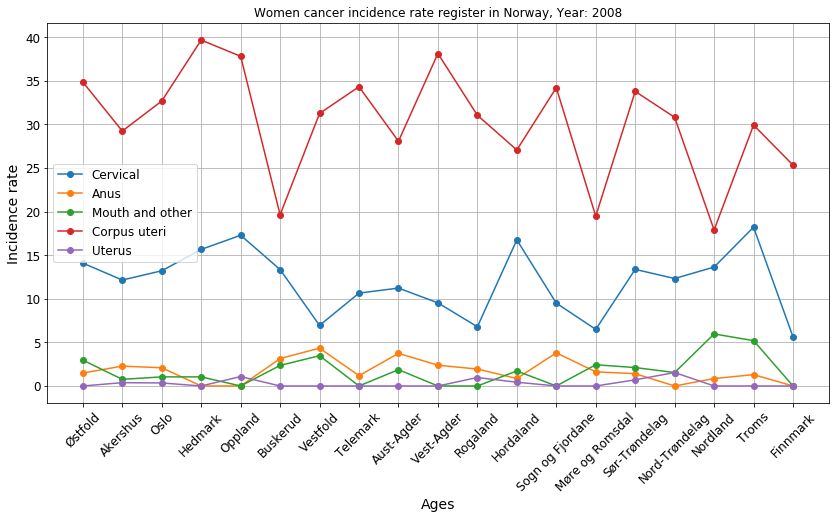

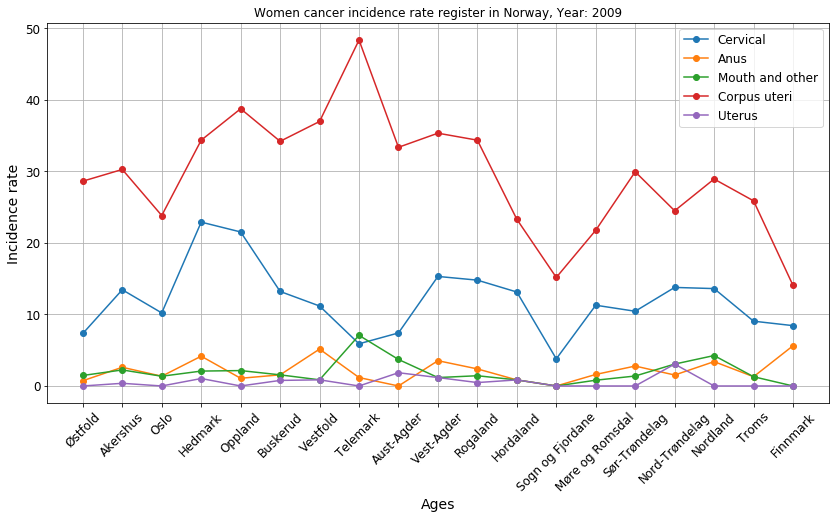

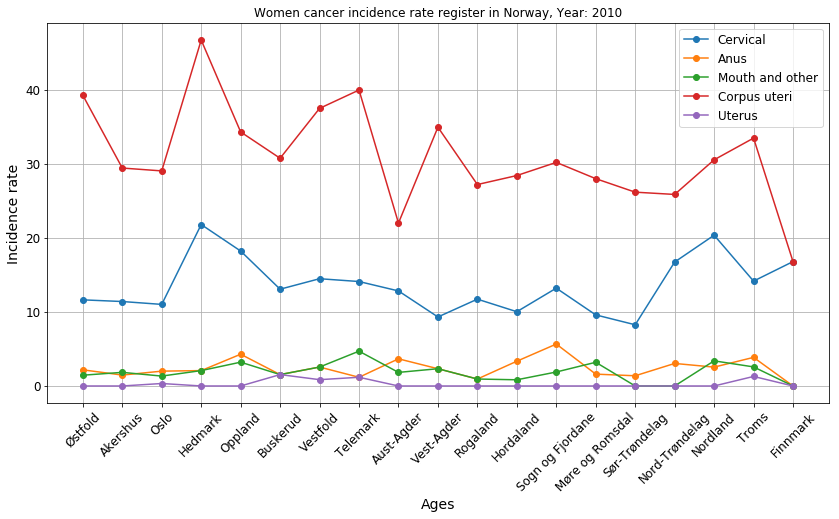

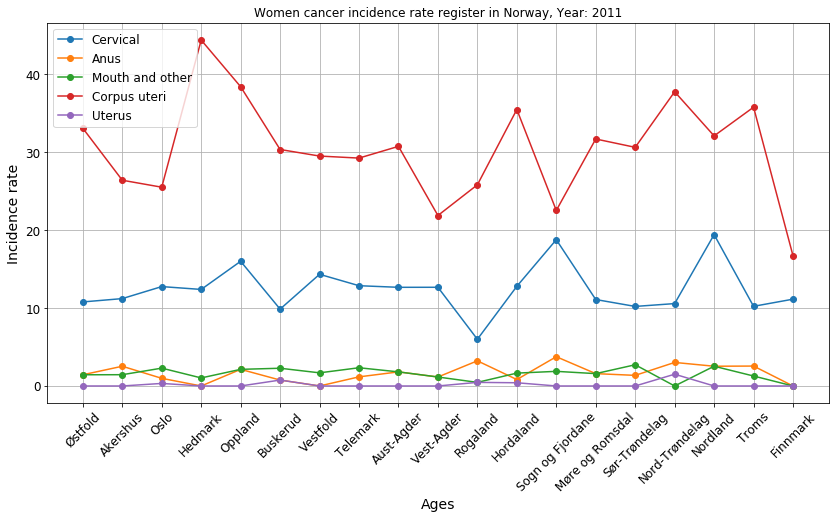

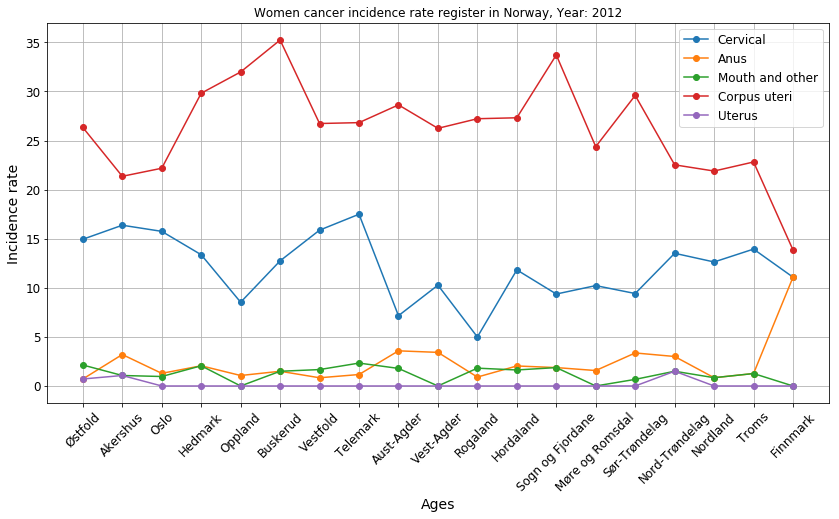

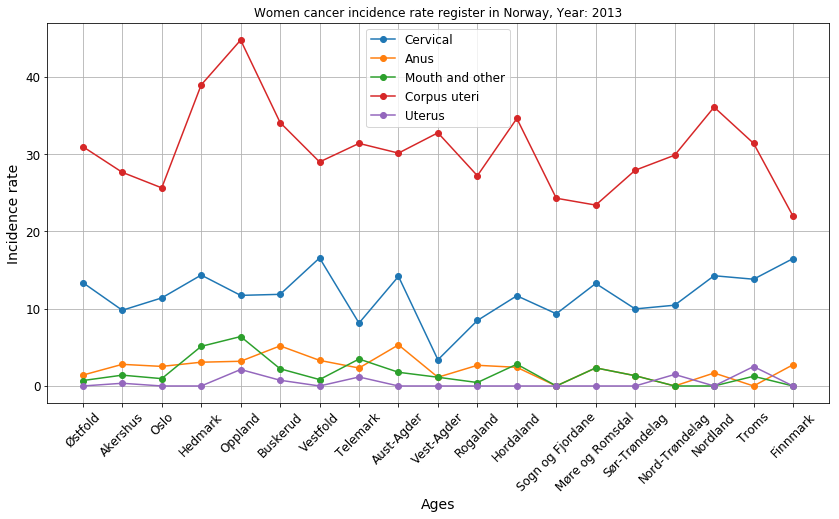

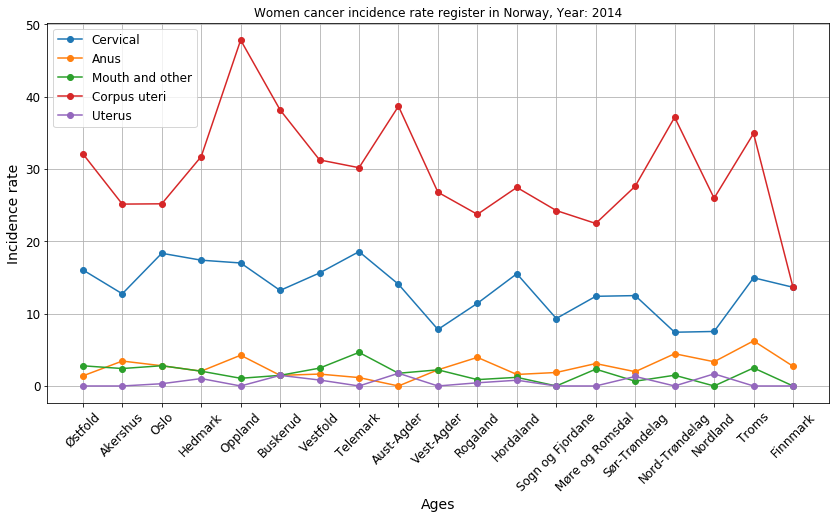

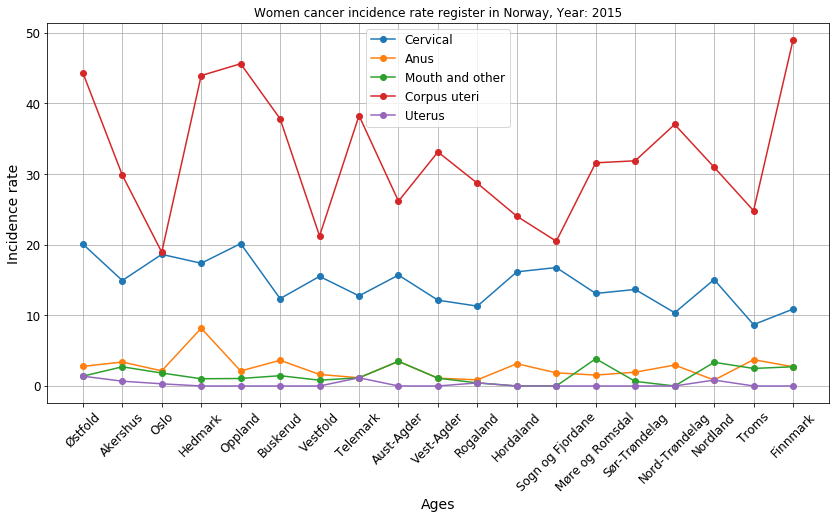

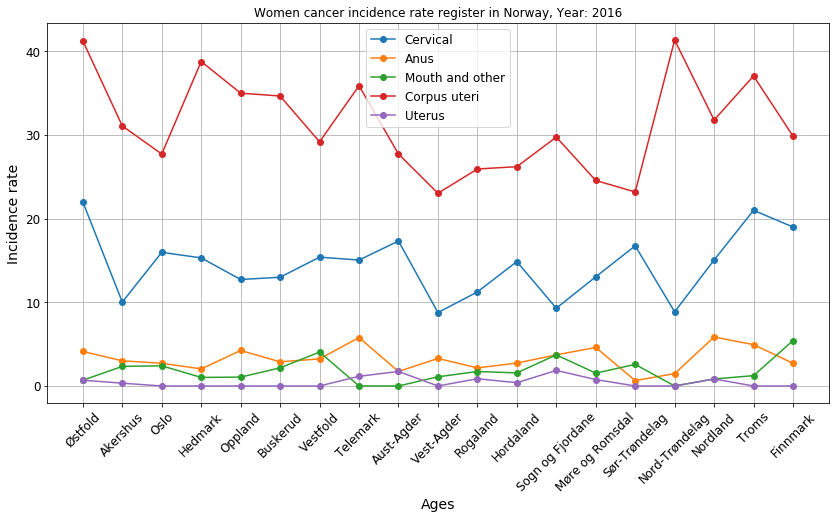

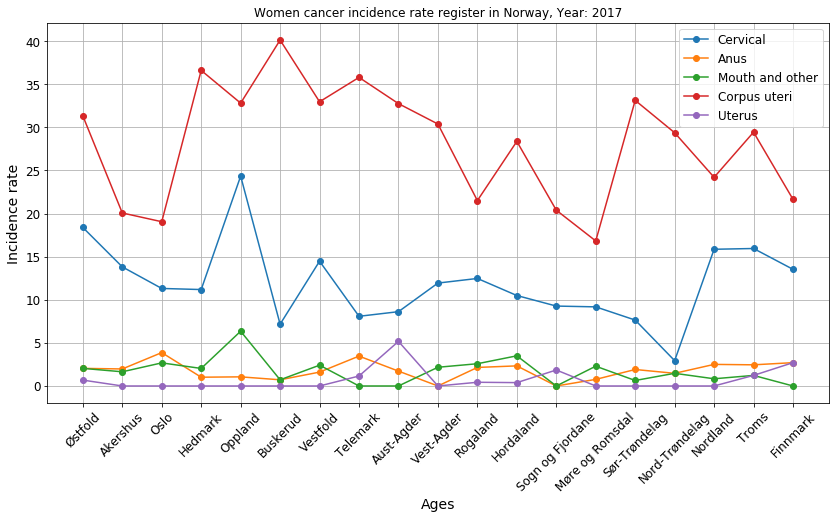

In [30]:
for i in range(len(inci_A_regions)):
    fig, ax = mpf.plot(x, inci_livmorhals_regions[i], titl='Women cancer incidence rate register in Norway, '+str(labels[i])+'', Xlabel='Ages', 
                   Ylabel='Incidence rate', ltype = 'o-')
    ax.plot(x, inci_A_regions[i], 'o-')
    ax.plot(x, inci_MO_regions[i], 'o-')
    ax.plot(x, inci_livmorlegeme_regions[i], 'o-')
    ax.plot(x, inci_livmor_regions[i], 'o-')

    locator=MaxNLocator(nbins=20)
    ax.xaxis.set_major_locator(locator)
    ax.set_xticklabels(regions, rotation=45)
    ax.legend(c_label)
    
    ## saving figure
    fig.savefig("plots/Female/region_Women_cancer_incidence_"+str(labels[i])+".png")

#### Total per year case

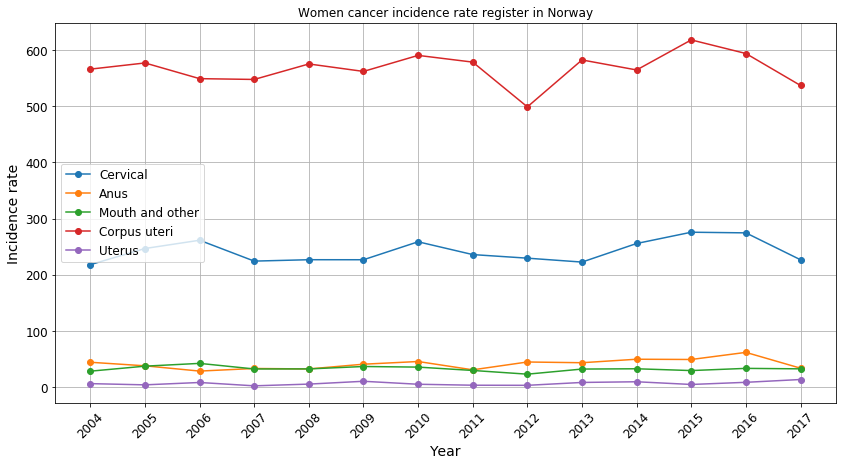

In [31]:
x = np.linspace(0,len(inci_livmorhals_regions)-1, len(inci_livmorhals_regions))

fig, ax = mpf.plot(x, total_c_livmorhals, titl='Women cancer incidence rate register in Norway', Xlabel='Year', 
                   Ylabel='Incidence rate', ltype = 'o-')
ax.plot(x, total_c_A, 'o-')
ax.plot(x, total_c_MO, 'o-')
ax.plot(x, total_c_livmorlegeme, 'o-')
ax.plot(x, total_c_livmor, 'o-')

locator = MaxNLocator(nbins=15)
ax.xaxis.set_major_locator(locator)
ax.set_xticklabels([0]+year_labels, rotation=45)
ax.legend(c_label)
## saving figure
fig.savefig("plots/Female/region_Women_cancer_total_incidence(year).png")